#Preparación de los datos

##Extracción del Archivo Tratado

Importación de los datos desde un archivo CSV alojado en un repositorio de GitHub. El dataset corresponde a información de clientes de una empresa de telecomunicaciones, incluyendo características contractuales, demográficas y de servicios utilizados.

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/gloriaCV/challenge-telecomx-2/refs/heads/main/datos_tratados.csv"

datos = pd.read_csv(url)
datos.head()

ID_Cliente  Abandono  Genero  Adulto_Mayor  Pareja  Dependientes  \
0  0002-ORFBO         0  Female             0       1             1   
1  0003-MKNFE         0    Male             0       0             0   
2  0004-TLHLJ         1    Male             0       0             0   
3  0011-IGKFF         1    Male             1       1             0   
4  0013-EXCHZ         1  Female             1       1             0   

   Antiguedad_Meses  Servicio_Telefonico Multiples_Lineas Servicio_Internet  \
0                 9                    1               No               DSL   
1                 9                    1              Yes               DSL   
2                 4                    1               No       Fiber optic   
3                13                    1               No       Fiber optic   
4                 3                    1               No       Fiber optic   

   ... Proteccion_Dispositivo Soporte_Tecnico Streaming_TV  \
0  ...                     No             Yes          Yes   
1  ...                     No              No           No   
2  ...                    Yes              No           No   
3  ...                    Yes              No          Yes   
4  ...                     No             Yes          Yes   

  Streaming_Peliculas        Contrato Facturacion_Sin_Papel       Metodo_Pago  \
0                  No        One year                     1      Mailed check   
1                 Yes  Month-to-month                     0      Mailed check   
2                  No  Month-to-month                     1  Electronic check   
3                 Yes  Month-to-month                     1  Electronic check   
4                  No  Month-to-month                     1      Mailed check   

   Cargos_Mensuales Cargos_Totales  Cargos_Diarios  
0              65.6         593.30        2.186667  
1              59.9         542.40        1.996667  
2              73.9         280.85        2.463333  
3              98.0        1237.85        3.266667  
4              83.9         267.40        2.796667  

[5 rows x 22 columns]

###Revisión inicial
Se detectaron columnas categóricas, numéricas y booleanas.

In [2]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID_Cliente              7043 non-null   object 
 1   Abandono                7043 non-null   int64  
 2   Genero                  7043 non-null   object 
 3   Adulto_Mayor            7043 non-null   int64  
 4   Pareja                  7043 non-null   int64  
 5   Dependientes            7043 non-null   int64  
 6   Antiguedad_Meses        7043 non-null   int64  
 7   Servicio_Telefonico     7043 non-null   int64  
 8   Multiples_Lineas        7043 non-null   object 
 9   Servicio_Internet       7043 non-null   object 
 10  Seguridad_Online        7043 non-null   object 
 11  Copia_Seguridad_Online  7043 non-null   object 
 12  Proteccion_Dispositivo  7043 non-null   object 
 13  Soporte_Tecnico         7043 non-null   object 
 14  Streaming_TV            7043 non-null   

##Eliminación de Columnas Irrelevantes

In [3]:
df = datos.drop('ID_Cliente', axis=1)
df.head()

Abandono  Genero  Adulto_Mayor  Pareja  Dependientes  Antiguedad_Meses  \
0         0  Female             0       1             1                 9   
1         0    Male             0       0             0                 9   
2         1    Male             0       0             0                 4   
3         1    Male             1       1             0                13   
4         1  Female             1       1             0                 3   

   Servicio_Telefonico Multiples_Lineas Servicio_Internet Seguridad_Online  \
0                    1               No               DSL               No   
1                    1              Yes               DSL               No   
2                    1               No       Fiber optic               No   
3                    1               No       Fiber optic               No   
4                    1               No       Fiber optic               No   

   ... Proteccion_Dispositivo Soporte_Tecnico Streaming_TV  \
0  ...                     No             Yes          Yes   
1  ...                     No              No           No   
2  ...                    Yes              No           No   
3  ...                    Yes              No          Yes   
4  ...                     No             Yes          Yes   

  Streaming_Peliculas        Contrato Facturacion_Sin_Papel       Metodo_Pago  \
0                  No        One year                     1      Mailed check   
1                 Yes  Month-to-month                     0      Mailed check   
2                  No  Month-to-month                     1  Electronic check   
3                 Yes  Month-to-month                     1  Electronic check   
4                  No  Month-to-month                     1      Mailed check   

  Cargos_Mensuales  Cargos_Totales  Cargos_Diarios  
0             65.6          593.30        2.186667  
1             59.9          542.40        1.996667  
2             73.9          280.85        2.463333  
3             98.0         1237.85        3.266667  
4             83.9          267.40        2.796667  

[5 rows x 21 columns]

##VAnálisis Exploratorio de Datos (EDA)

El EDA tiene como objetivo comprender las características principales de los clientes y detectar patrones asociados al abandono.

[]

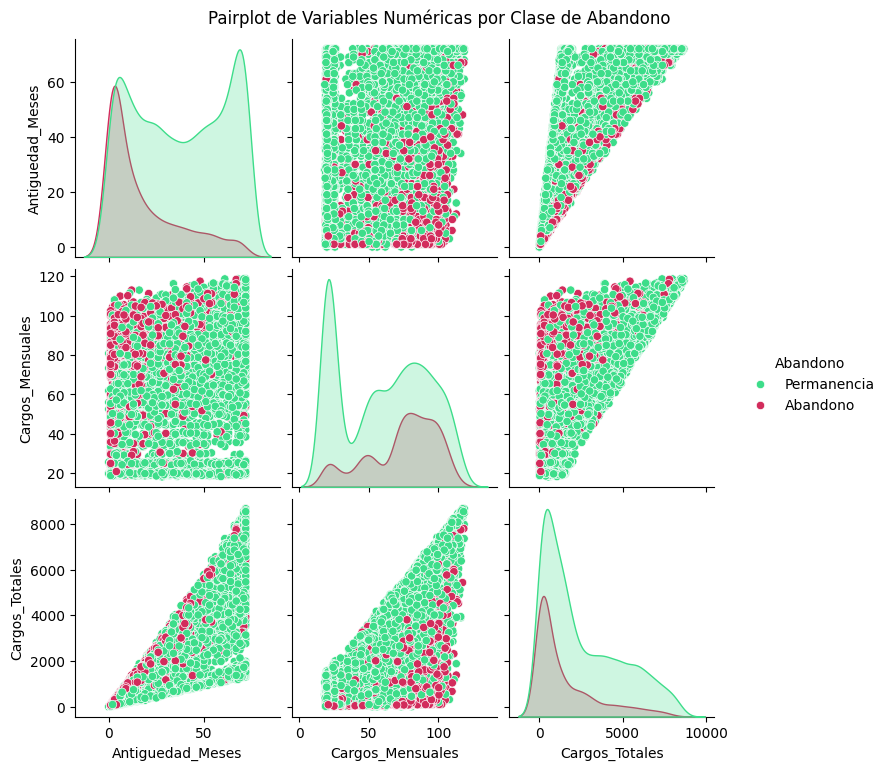

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

df_labeled = df.copy()
df_labeled['Abandono'] = df_labeled['Abandono'].map({0: 'Permanencia', 1: 'Abandono'})

palette_dict = {
    'Permanencia': '#3DDD8A',
    'Abandono': '#D22C5C'
}

numerical_cols = ['Antiguedad_Meses', 'Cargos_Mensuales', 'Cargos_Totales']

sns.pairplot(df_labeled, vars=numerical_cols, hue='Abandono', palette=palette_dict)
plt.suptitle('Pairplot de Variables Numéricas por Clase de Abandono', y=1.02)
plt.savefig('pairplot_variables_numericas.png')
plt.plot()

* Distribuciones numéricas:

 * Variables como antigüedad (tenure) y facturación mensual (MonthlyCharges) mostraron relación directa con la retención.

 * Los clientes con baja antigüedad y cuentas más caras tienden a tener mayor probabilidad de cancelar.

[]

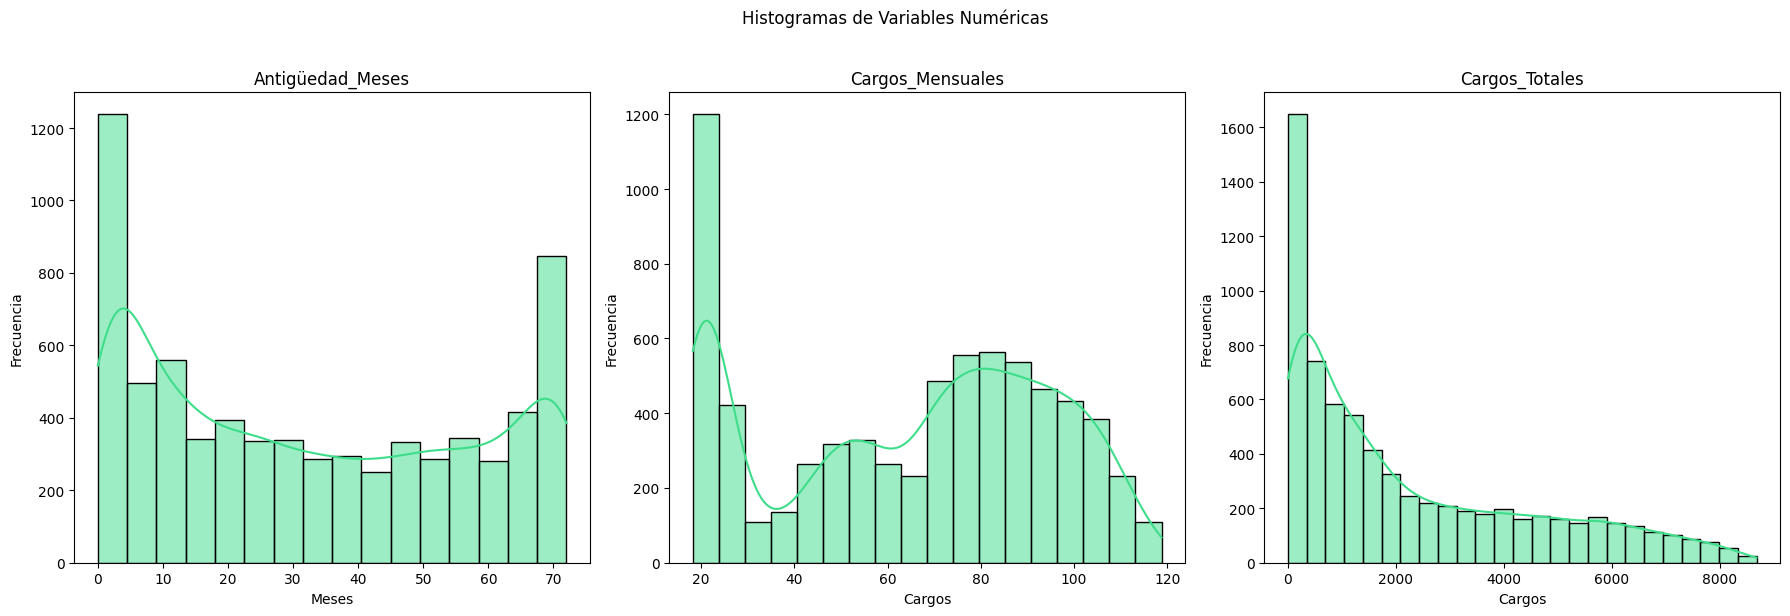

In [5]:
palette_dict = {
    'Permanencia': '#3DDD8A',
    'Abandono': '#D22C5C'
}

sns.set_palette([palette_dict['Permanencia']])
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Histogramas de Variables Numéricas', y=1.02)

sns.histplot(df['Antiguedad_Meses'], kde=True, ax=axes[0], color=palette_dict['Permanencia'])
axes[0].set_title('Antigüedad_Meses')
axes[0].set_xlabel('Meses')
axes[0].set_ylabel('Frecuencia')

sns.histplot(df['Cargos_Mensuales'], kde=True, ax=axes[1], color=palette_dict['Permanencia'])
axes[1].set_title('Cargos_Mensuales')
axes[1].set_xlabel('Cargos')
axes[1].set_ylabel('Frecuencia')

sns.histplot(df['Cargos_Totales'], kde=True, ax=axes[2], color=palette_dict['Permanencia'])
axes[2].set_title('Cargos_Totales')
axes[2].set_xlabel('Cargos')
axes[2].set_ylabel('Frecuencia')

plt.tight_layout()
plt.savefig('histogramas_variables_numericas.png')
plt.plot()

[]

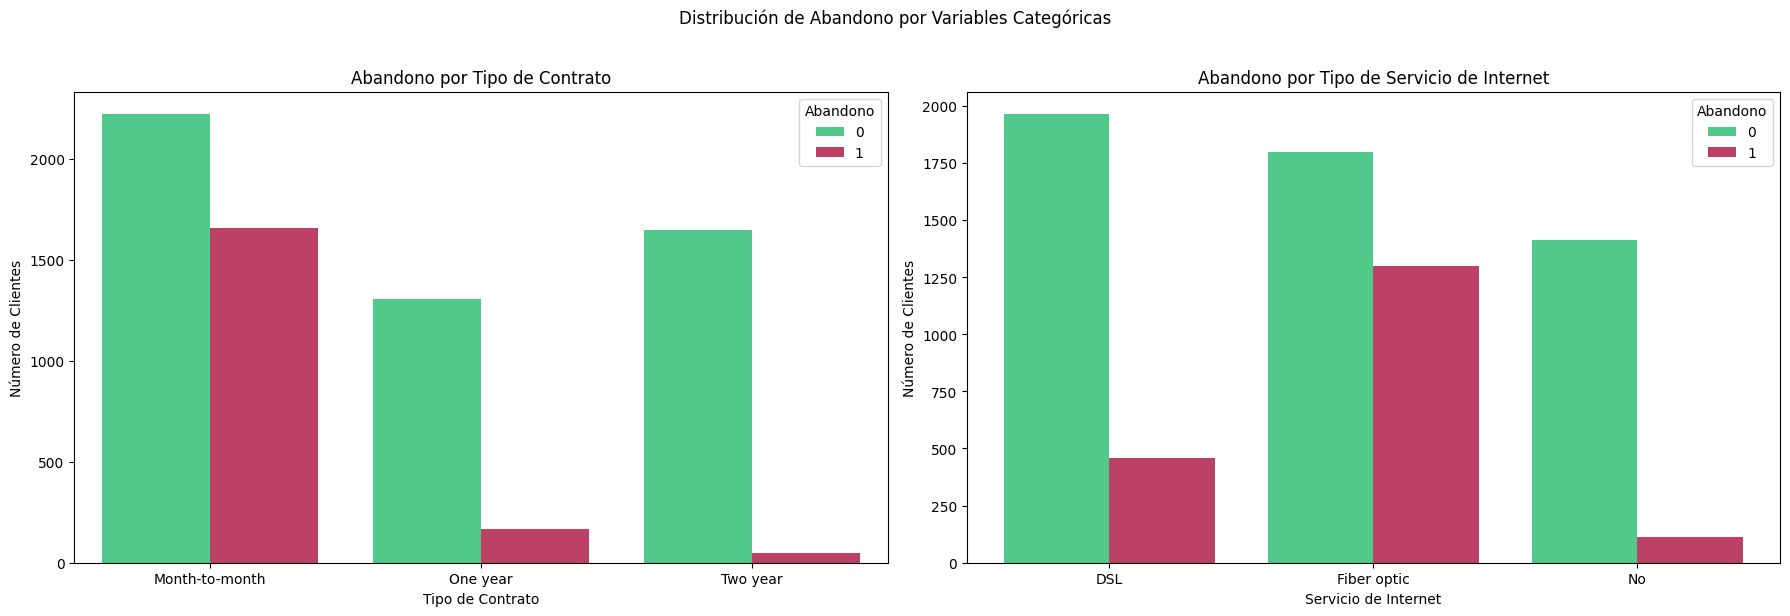

In [6]:
categorical_cols = ['Contrato', 'Servicio_Internet']

fig, axes = plt.subplots(1, 2, figsize=(18, 6))
fig.suptitle('Distribución de Abandono por Variables Categóricas', y=1.02)

sns.set_palette([palette_dict['Permanencia'], palette_dict['Abandono']])

contrato_order = ['Month-to-month', 'One year', 'Two year']

sns.countplot(data=df, x='Contrato', hue='Abandono', order=contrato_order, ax=axes[0])
axes[0].set_title('Abandono por Tipo de Contrato')
axes[0].set_xlabel('Tipo de Contrato')
axes[0].set_ylabel('Número de Clientes')
axes[0].tick_params(axis='x')

sns.countplot(data=df, x='Servicio_Internet', hue='Abandono', ax=axes[1])
axes[1].set_title('Abandono por Tipo de Servicio de Internet')
axes[1].set_xlabel('Servicio de Internet')
axes[1].set_ylabel('Número de Clientes')
axes[1].tick_params(axis='x')

plt.tight_layout()
plt.savefig('barplots_variables_categoricas.png')
plt.plot()

* Distribuciones categóricas:

 * Se graficaron proporciones de clientes por género, estado civil, tipo de contrato y servicios adicionales contratados.

 * Se observó que los clientes con contratos mensuales representan una proporción significativa de quienes abandonan el servicio.

##Encoding

* Transformación de variables categóricas a numéricas mediante **Get Dummies**.

In [7]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
print("\nCategorical columns to encode:")
print(categorical_cols)


Categorical columns to encode:
['Genero', 'Multiples_Lineas', 'Servicio_Internet', 'Seguridad_Online', 'Copia_Seguridad_Online', 'Proteccion_Dispositivo', 'Soporte_Tecnico', 'Streaming_TV', 'Streaming_Peliculas', 'Contrato', 'Metodo_Pago']


In [8]:
df= pd.get_dummies(df, columns=categorical_cols)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 43 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Abandono                                    7043 non-null   int64  
 1   Adulto_Mayor                                7043 non-null   int64  
 2   Pareja                                      7043 non-null   int64  
 3   Dependientes                                7043 non-null   int64  
 4   Antiguedad_Meses                            7043 non-null   int64  
 5   Servicio_Telefonico                         7043 non-null   int64  
 6   Facturacion_Sin_Papel                       7043 non-null   int64  
 7   Cargos_Mensuales                            7043 non-null   float64
 8   Cargos_Totales                              7043 non-null   float64
 9   Cargos_Diarios                              7043 non-null   float64
 10  Genero_Femal

In [10]:
df.head()

Abandono  Adulto_Mayor  Pareja  Dependientes  Antiguedad_Meses  \
0         0             0       1             1                 9   
1         0             0       0             0                 9   
2         1             0       0             0                 4   
3         1             1       1             0                13   
4         1             1       1             0                 3   

   Servicio_Telefonico  Facturacion_Sin_Papel  Cargos_Mensuales  \
0                    1                      1              65.6   
1                    1                      0              59.9   
2                    1                      1              73.9   
3                    1                      1              98.0   
4                    1                      1              83.9   

   Cargos_Totales  Cargos_Diarios  ...  Streaming_Peliculas_No  \
0          593.30        2.186667  ...                    True   
1          542.40        1.996667  ...                   False   
2          280.85        2.463333  ...                    True   
3         1237.85        3.266667  ...                   False   
4          267.40        2.796667  ...                    True   

   Streaming_Peliculas_No internet service  Streaming_Peliculas_Yes  \
0                                    False                    False   
1                                    False                     True   
2                                    False                    False   
3                                    False                     True   
4                                    False                    False   

   Contrato_Month-to-month  Contrato_One year  Contrato_Two year  \
0                    False               True              False   
1                     True              False              False   
2                     True              False              False   
3                     True              False              False   
4                     True              False              False   

   Metodo_Pago_Bank transfer (automatic)  Metodo_Pago_Credit card (automatic)  \
0                                  False                                False   
1                                  False                                False   
2                                  False                                False   
3                                  False                                False   
4                                  False                                False   

   Metodo_Pago_Electronic check  Metodo_Pago_Mailed check  
0                         False                      True  
1                         False                      True  
2                          True                     False  
3                          True                     False  
4                         False                      True  

[5 rows x 43 columns]

##Verificación de la Proporción de Abandono (Churn)

Se visualiza un fuerte desbalanceo de clases.

In [11]:
df['Abandono'].value_counts()

Abandono
0    5174
1    1869
Name: count, dtype: int64

In [12]:
churn_proportions = df['Abandono'].value_counts(normalize=True)*100
churn_proportions

Abandono
0    73.463013
1    26.536987
Name: proportion, dtype: float64

[]

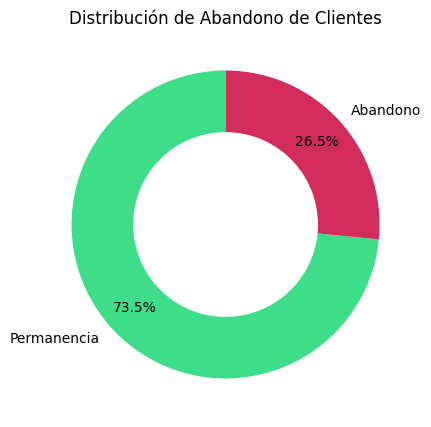

In [13]:
palette_dict = {
    0: '#3DDD8A',
    1: '#D22C5C'
}

churn_counts = df['Abandono'].value_counts()
labels = ['Permanencia', 'Abandono']
colors = [palette_dict[0], palette_dict[1]]

plt.figure(figsize=(5, 5))
plt.pie(churn_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors,
        wedgeprops=dict(width=0.4), pctdistance=0.80)
plt.title('Distribución de Abandono de Clientes')
plt.savefig('grafico_donut_abandono.png')
plt.plot()

##Correlación y Selección de Variables

Se realiza análisis de correlación para evitar la **multicolinealidad**. Este paso es clave porque cuando dos o más variables están altamente correlacionadas, pueden distorsionar la interpretación de los modelos y reducir la calidad de las predicciones.

Pares de variables con alta correlación (abs > 0.7):
'Antiguedad_Meses' y 'Cargos_Totales': Correlación = 0.83
'Servicio_Telefonico' y 'Multiples_Lineas_No phone service': Correlación = -1.00
'Cargos_Mensuales' y 'Cargos_Diarios': Correlación = 1.00
'Cargos_Mensuales' y 'Servicio_Internet_Fiber optic': Correlación = 0.79
'Cargos_Mensuales' y 'Servicio_Internet_No': Correlación = -0.76
'Cargos_Mensuales' y 'Seguridad_Online_No internet service': Correlación = -0.76
'Cargos_Mensuales' y 'Copia_Seguridad_Online_No internet service': Correlación = -0.76
'Cargos_Mensuales' y 'Proteccion_Dispositivo_No internet service': Correlación = -0.76
'Cargos_Mensuales' y 'Soporte_Tecnico_No internet service': Correlación = -0.76
'Cargos_Mensuales' y 'Streaming_TV_No internet service': Correlación = -0.76
'Cargos_Mensuales' y 'Streaming_Peliculas_No internet service': Correlación = -0.76
'Cargos_Diarios' y 'Servicio_Internet_Fiber optic': Correlación = 0.79
'Cargos_Diarios' y 'Servicio_Internet_No': Co

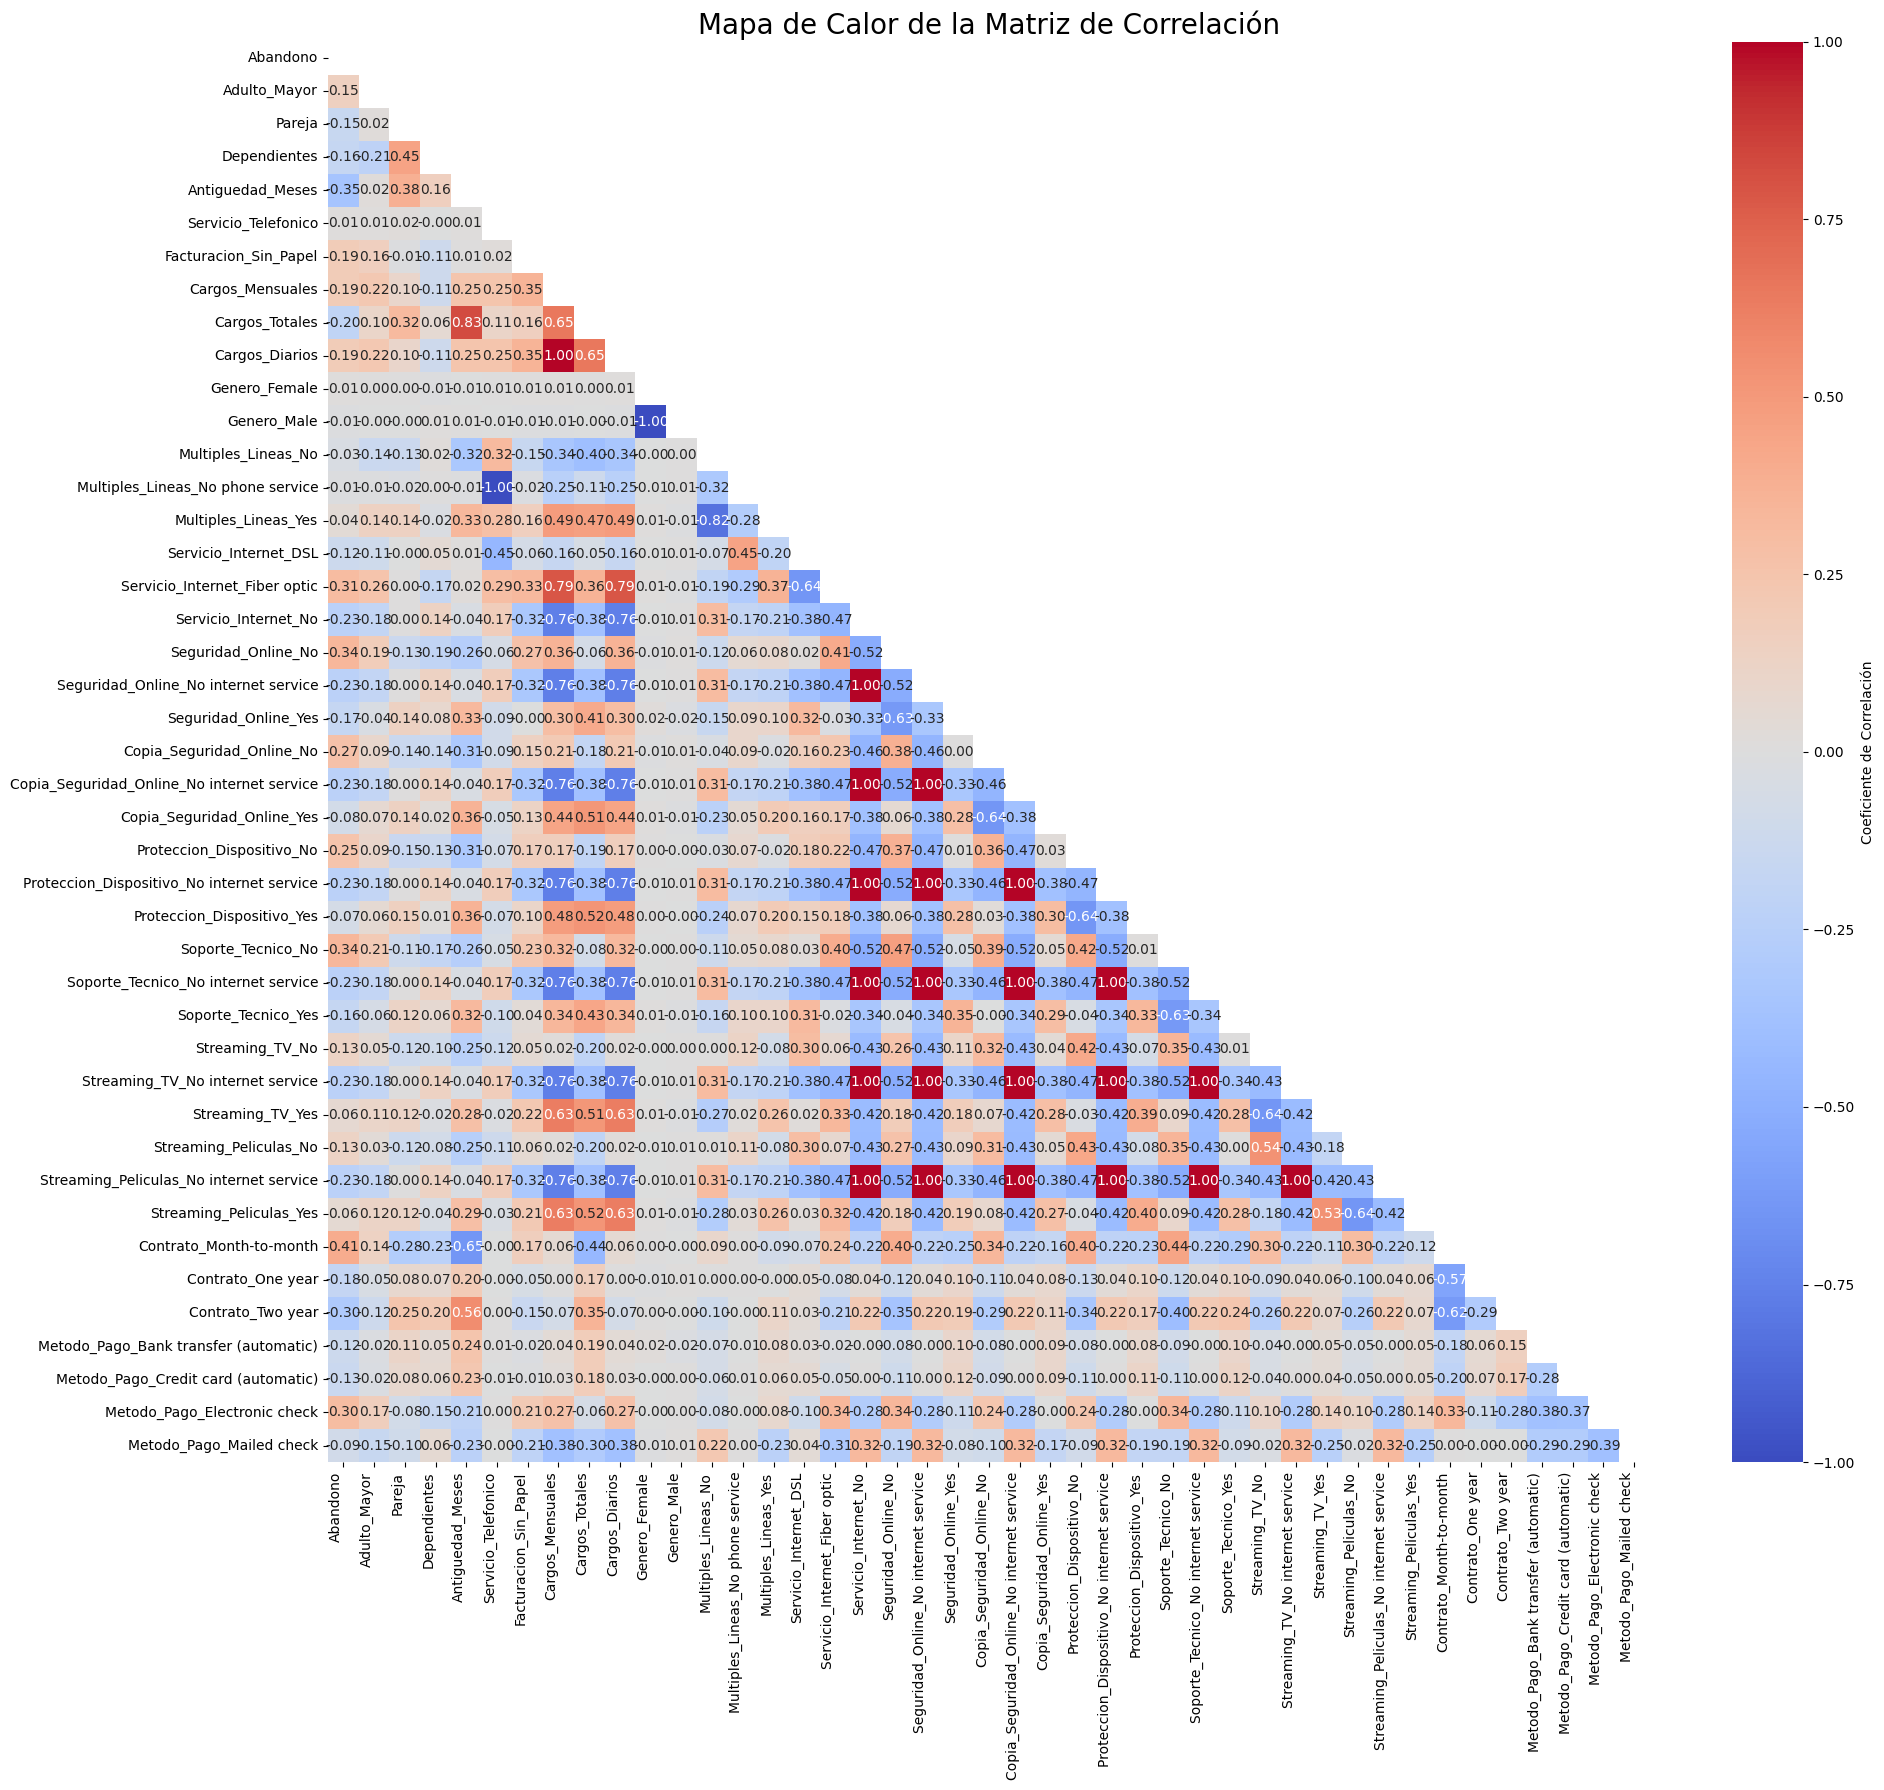

In [14]:
import numpy as np

correlation_matrix = df.corr()

plt.figure(figsize=(20, 18))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', mask=mask,
            cbar_kws={'label': 'Coeficiente de Correlación'})
plt.title('Mapa de Calor de la Matriz de Correlación', fontsize=20)
plt.xticks(rotation=90, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('mapa_calor_correlacion_1.png')
plt.plot()

high_corr_threshold = 0.7
high_corr_pairs = {}
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > high_corr_threshold:
            pair = (correlation_matrix.columns[i], correlation_matrix.columns[j])
            high_corr_pairs[pair] = correlation_matrix.iloc[i, j]

print("Pares de variables con alta correlación (abs > 0.7):")
for pair, corr in high_corr_pairs.items():
    print(f"'{pair[0]}' y '{pair[1]}': Correlación = {corr:.2f}")

El análisis revela múltiples pares de variables con una alta correlación, lo cual puede afectar la estabilidad y la interpretabilidad de los modelos predictivos como la regresión logística. Para mitigar este problema, se eliminan las siguientes columnas:

* `Cargos_Diarios` y `Cargos_Mensuales` (Correlación = 1.00): Tienen una correlación perfecta. Una de ellas puede ser eliminada, ya que ambas representan la misma información. Se eliminará `Cargos_Diarios`.

* `Cargos_Totales` y `Antiguedad_Meses` (Correlación = 0.83): Hay una alta correlación positiva, lo que es lógico ya que los cargos totales son la suma de los cargos mensuales a lo largo del tiempo. Se reliminará `Cargos_Totales` para que las otras variables aporten información de forma independiente.

* `Servicio_Telefonico` y `Multiples_Lineas_No phone service` (Correlación = -1.00): Se trata de la misma información. `Servicio_Telefonico` indica si el cliente tiene servicio, y `Multiples_Lineas_No phone service` es lo contrario. Se eliminará `Multiples_Lineas_No phone service`.

* Columnas de tipo `_No internet service`: Varias de estas columnas, como `Seguridad_Online_No internet service` y `Copia_Seguridad_Online_No internet service`, tienen una correlación de 1.00 con la columna `Servicio_Internet_No`. Esto se debe a que si un cliente no tiene servicio de internet, no puede tener ninguno de estos servicios adicionales. Por lo tanto, se eliminarán todas las columnas de tipo `_No internet service`.

* `Genero_Female` y `Genero_Male` (Correlación = -1.00): La multicolinealidad perfecta entre estas dos columnas es esperada, ya que la presencia de una implica la ausencia de la otra. Se eliminará `Genero_Male`.

Eliminar estas columnas simplificará el modelo y mejorará la interpretabilidad sin perder información significativa.

Columnas en el DataFrame después de la limpieza:
['Abandono', 'Adulto_Mayor', 'Pareja', 'Dependientes', 'Antiguedad_Meses', 'Servicio_Telefonico', 'Facturacion_Sin_Papel', 'Cargos_Mensuales', 'Genero_Female', 'Multiples_Lineas_No', 'Multiples_Lineas_Yes', 'Servicio_Internet_DSL', 'Servicio_Internet_Fiber optic', 'Seguridad_Online_No', 'Seguridad_Online_Yes', 'Copia_Seguridad_Online_No', 'Copia_Seguridad_Online_Yes', 'Proteccion_Dispositivo_No', 'Proteccion_Dispositivo_Yes', 'Soporte_Tecnico_No', 'Soporte_Tecnico_Yes', 'Streaming_TV_No', 'Streaming_TV_Yes', 'Streaming_Peliculas_No', 'Streaming_Peliculas_Yes', 'Contrato_Month-to-month', 'Contrato_One year', 'Contrato_Two year', 'Metodo_Pago_Bank transfer (automatic)', 'Metodo_Pago_Credit card (automatic)', 'Metodo_Pago_Electronic check', 'Metodo_Pago_Mailed check']


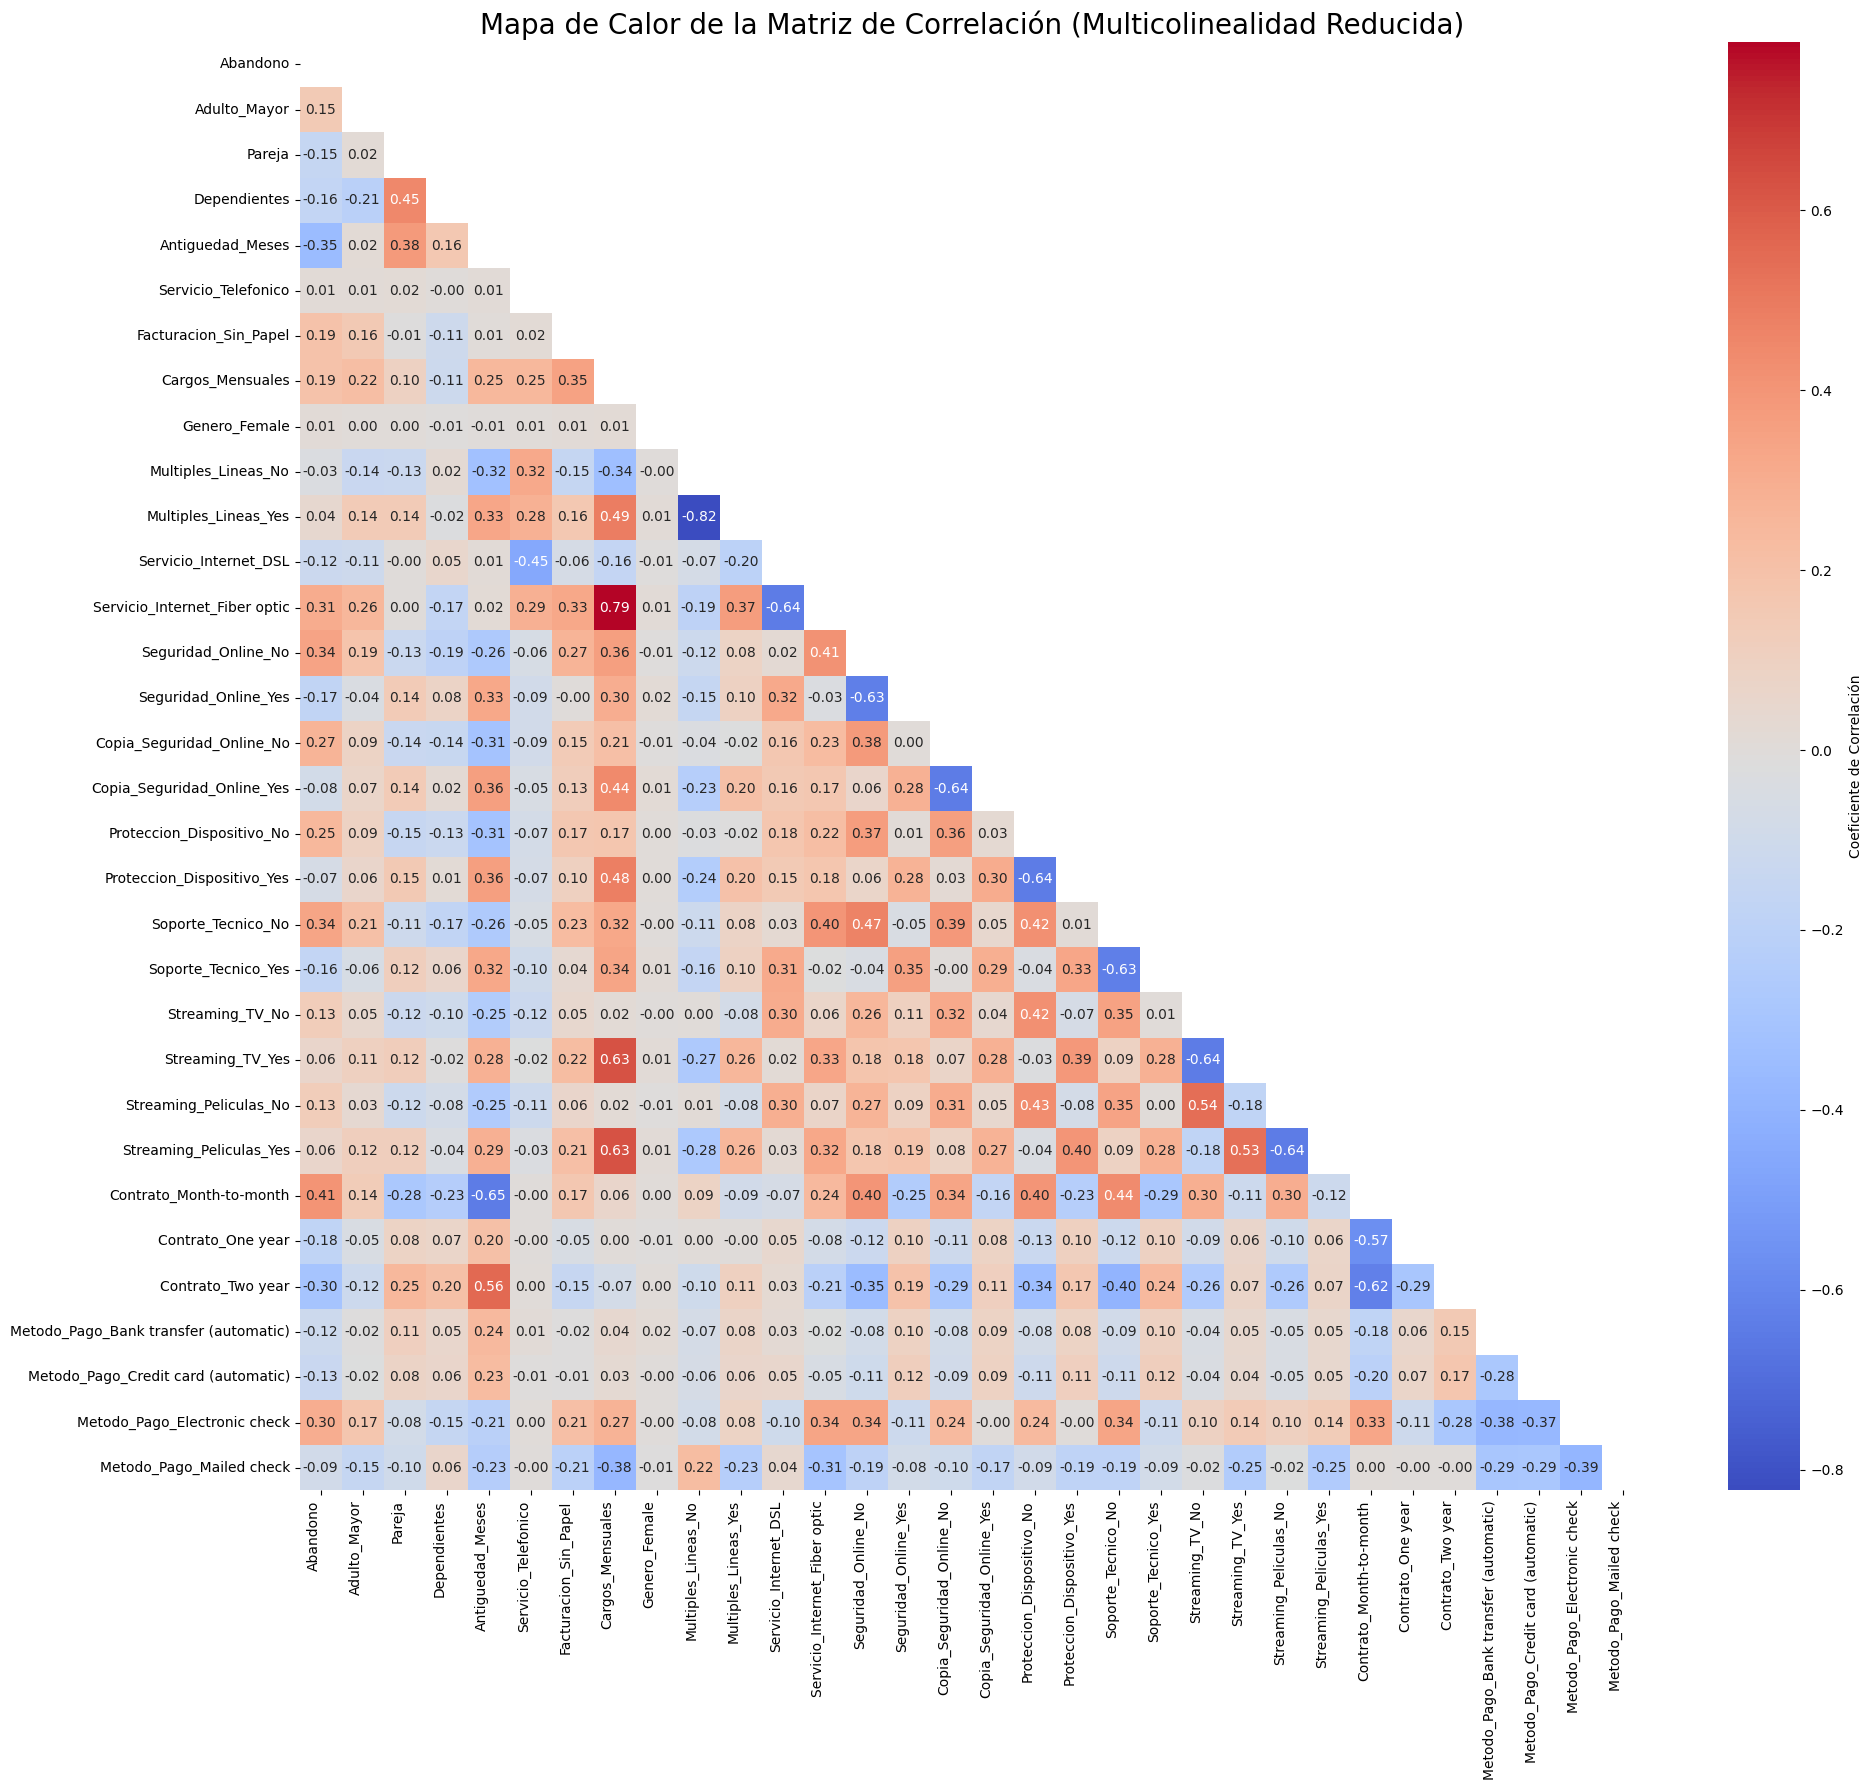

In [15]:
columns_to_drop = [
    'Cargos_Diarios',
    'Cargos_Totales',
    'Multiples_Lineas_No phone service',
    'Servicio_Internet_No',
    'Seguridad_Online_No internet service',
    'Copia_Seguridad_Online_No internet service',
    'Proteccion_Dispositivo_No internet service',
    'Soporte_Tecnico_No internet service',
    'Streaming_TV_No internet service',
    'Streaming_Peliculas_No internet service',
    'Genero_Male'
]

df_cleaned = df.drop(columns=columns_to_drop)

correlation_matrix_cleaned = df_cleaned.corr()

plt.figure(figsize=(20, 18))
mask = np.triu(np.ones_like(correlation_matrix_cleaned, dtype=bool))
sns.heatmap(correlation_matrix_cleaned, annot=True, fmt=".2f", cmap='coolwarm', mask=mask,
            cbar_kws={'label': 'Coeficiente de Correlación'})
plt.title('Mapa de Calor de la Matriz de Correlación (Multicolinealidad Reducida)', fontsize=20)
plt.xticks(rotation=90, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('mapa_calor_correlacion_2.png')
plt.plot()

print("Columnas en el DataFrame después de la limpieza:")
print(df_cleaned.columns.tolist())

In [16]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Abandono                               7043 non-null   int64  
 1   Adulto_Mayor                           7043 non-null   int64  
 2   Pareja                                 7043 non-null   int64  
 3   Dependientes                           7043 non-null   int64  
 4   Antiguedad_Meses                       7043 non-null   int64  
 5   Servicio_Telefonico                    7043 non-null   int64  
 6   Facturacion_Sin_Papel                  7043 non-null   int64  
 7   Cargos_Mensuales                       7043 non-null   float64
 8   Genero_Female                          7043 non-null   bool   
 9   Multiples_Lineas_No                    7043 non-null   bool   
 10  Multiples_Lineas_Yes                   7043 non-null   bool   
 11  Serv

#Modelo Predictivo

###**Introducción al Modelado Predictivo**

En esta etapa del proyecto se construyeron y evaluaron modelos de clasificación para identificar a los clientes con mayor probabilidad de abandonar **TelecomX** (churn). La variable objetivo **Abandono** toma el valor 0 si el cliente permanece y 1 si abandona.

Dado que los clientes que se van representan una minoría, el problema presenta un **desbalance de clases**. En este contexto, métricas como la exactitud pueden resultar engañosas, ya que un modelo que prediga mayoritariamente la clase 0 puede mostrar buen desempeño global, pero sin detectar a quienes efectivamente abandonan.

Por ello, se priorizó el **Recall** (sensibilidad), que mide la capacidad del modelo para identificar correctamente a los clientes que abandonan:

$$Recall = \frac{TP}{TP + FN}$$
	​


donde:

* **TP** = clientes que abandonaron y fueron correctamente identificados.

* **FN** = clientes que abandonaron pero el modelo no logró detectar.

Maximizar el Recall permite **reducir los falsos negativos**, asegurando que la compañía pueda anticipar y aplicar estrategias de retención a la mayor cantidad posible de clientes en riesgo.

##**REGRESIÓN LOGÍSTICA**

* Modelo lineal utilizado como baseline.

* Ventaja: interpretabilidad de los coeficientes.

* Limitación: menor capacidad para capturar relaciones no lineales.

In [17]:
X = df_cleaned.drop("Abandono", axis=1)
y = df_cleaned["Abandono"]

In [18]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=61
)

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Entrenar el modelo inicial para obtener importancia de features

In [20]:
import numpy as np
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=500, solver="liblinear", random_state=61)
log_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=500, random_state=61, solver='liblinear')

Guardar coeficientes absolutos

In [21]:
feature_importances = pd.DataFrame({
    "Features": X.columns,
    "Coef": np.abs(log_model.coef_[0])
}).sort_values(by="Coef", ascending=False).reset_index(drop=True)

In [22]:
print(" Features más importantes según Regresión Logística:")
print(feature_importances.head(20))

 Features más importantes según Regresión Logística:
                         Features      Coef
0                Antiguedad_Meses  0.877830
1   Servicio_Internet_Fiber optic  0.392385
2                Cargos_Mensuales  0.357985
3               Contrato_Two year  0.293348
4         Contrato_Month-to-month  0.275578
5         Streaming_Peliculas_Yes  0.236423
6                Streaming_TV_Yes  0.228096
7             Seguridad_Online_No  0.224674
8              Soporte_Tecnico_No  0.202659
9      Proteccion_Dispositivo_Yes  0.154872
10      Copia_Seguridad_Online_No  0.145317
11          Facturacion_Sin_Papel  0.142651
12          Servicio_Internet_DSL  0.130374
13     Copia_Seguridad_Online_Yes  0.127071
14      Proteccion_Dispositivo_No  0.118699
15   Metodo_Pago_Electronic check  0.111771
16                   Adulto_Mayor  0.110165
17                   Dependientes  0.109681
18            Multiples_Lineas_No  0.092094
19           Multiples_Lineas_Yes  0.087929


**Evaluar eficiencia de features**:

In [23]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

resultados = pd.DataFrame(index=["Accuracy_Mean", "Accuracy_Std",
                                 "Precision_Mean", "Precision_Std",
                                 "Recall_Mean", "Recall_Std",
                                 "F1_Mean", "F1_Std",
                                 "ROC_AUC_Mean", "ROC_AUC_Std"])



Rango de features a probar

In [24]:
ct_features = list(range(17,22))

In [25]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=61)

**Evaluación de la Eficiencia con Validación Cruzada**:

In [26]:
for k in ct_features:
    selected_features = feature_importances["Features"].values[:k]

    X_train_sel = X_train[selected_features]
    X_test_sel = X_test[selected_features]

    # Escalar
    scaler = StandardScaler()
    X_train_sel_scaled = scaler.fit_transform(X_train_sel)
    X_test_sel_scaled = scaler.transform(X_test_sel)

    model = LogisticRegression(max_iter=500, solver="liblinear", random_state=61)

    # Validación cruzada para cada métrica
    acc = cross_val_score(model, X_train_sel_scaled, y_train, scoring="accuracy", cv=cv)
    prec = cross_val_score(model, X_train_sel_scaled, y_train, scoring=make_scorer(precision_score, pos_label=1), cv=cv)
    rec = cross_val_score(model, X_train_sel_scaled, y_train, scoring="recall", cv=cv)
    f1 = cross_val_score(model, X_train_sel_scaled, y_train, scoring="f1", cv=cv)
    roc = cross_val_score(model, X_train_sel_scaled, y_train, scoring="roc_auc", cv=cv)

    resultados[k] = [
        acc.mean(), acc.std(),
        prec.mean(), prec.std(),
        rec.mean(), rec.std(),
        f1.mean(), f1.std(),
        roc.mean(), roc.std()
    ]

In [27]:
#Resultados

print("\n Resultados comparativos (todas las métricas):")
print(resultados)

# Identificar mejor número de features según Recall
mejor_k = resultados.loc["Recall_Mean"].idxmax()
print(f"\n\n El mejor rendimiento para retener clientes se obtuvo con {mejor_k} features (según Recall).")


 Resultados comparativos (todas las métricas):
                      17        18        19        20        21
Accuracy_Mean   0.801826  0.800406  0.801420  0.801826  0.801826
Accuracy_Std    0.016411  0.017108  0.011024  0.011395  0.011395
Precision_Mean  0.654102  0.649292  0.649992  0.650979  0.650979
Precision_Std   0.037243  0.038432  0.024334  0.025687  0.025687
Recall_Mean     0.536700  0.538224  0.545120  0.545883  0.545883
Recall_Std      0.040607  0.038825  0.027068  0.026697  0.026697
F1_Mean         0.589303  0.588377  0.592784  0.593645  0.593645
F1_Std          0.037207  0.037508  0.024241  0.024469  0.024469
ROC_AUC_Mean    0.840889  0.841183  0.842019  0.841948  0.841961
ROC_AUC_Std     0.009867  0.009709  0.009109  0.009129  0.009142


 El mejor rendimiento para retener clientes se obtuvo con 20 features (según Recall).


**Selección de features óptimas** (según Recall)

In [28]:
mejor_k = resultados.loc["Recall_Mean"].idxmax()
mejores_features_rl = feature_importances["Features"].values[:mejor_k]

X_train_sel = X_train[mejores_features_rl]
X_test_sel = X_test[mejores_features_rl]

**Optimización de Hiperparámetros y Evaluación**

In [29]:
from sklearn.model_selection import StratifiedKFold

# Definimos el espacio de búsqueda para LogisticRegression
param_grid = {
    "clf__C": [0.01, 0.1, 1, 10],     # fuerza de regularización
    "clf__penalty": ["l1", "l2"],     # tipo de penalización
    "clf__solver": ["liblinear"]      # solver compatible con L1 y L2
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=61)

Definición de la función para una evaluación extendida

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV, cross_val_score
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

def evaluar_modelo(nombre, X, y, sampler=None):

    steps = [("scaler", StandardScaler())]   # normalización

    if sampler is not None:                  # balanceo de clases
        steps.append(("sampler", sampler))

    pipeline = Pipeline(steps=steps + [("clf", LogisticRegression(max_iter=1000, random_state=61))])


    # Grid search con Recall como métrica principal
    grid = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        scoring="recall",
        cv=cv,
        n_jobs=-1
    )
    grid.fit(X, y)

    best_model = grid.best_estimator_


    # Validación cruzada con todas las métricas

    metricas = {}
    for score in ["accuracy", "precision", "recall", "f1", "roc_auc"]:
        scores = cross_val_score(best_model, X, y, cv=cv, scoring=score)

        # Guardamos media, desviación estándar e intervalo de confianza 95%
        media = scores.mean()
        std = scores.std()
        ci_inf, ci_sup = np.percentile(scores, [2.5, 97.5])

        metricas[score] = {"mean": media, "std": std, "ci": (ci_inf, ci_sup)}

    # Matriz de confusión en Test
    y_pred = best_model.predict(X_test_sel)
    cm = confusion_matrix(y_test, y_pred)


    print(f"\n Resultados {nombre}")
    print("Mejores parámetros:", grid.best_params_)
    for m, valores in metricas.items():
        print(f"{m.upper():<9} -> "
              f"Mean: {valores['mean']:.3f} | "
              f"Std: {valores['std']:.3f} | "
              f"95% CI: ({valores['ci'][0]:.3f}, {valores['ci'][1]:.3f})")


    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt="d", cmap=sns.light_palette("#D22C5C", as_cmap=True))
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.title(f"Matriz de confusión - {nombre}")
    plt.savefig(f"matriz_confusion_{nombre}_rl.png", dpi=300, bbox_inches="tight")
    plt.show()

    return grid, metricas


**Ejecución y comparación**


 Resultados Original
Mejores parámetros: {'clf__C': 0.01, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
ACCURACY  -> Mean: 0.798 | Std: 0.013 | 95% CI: (0.778, 0.813)
PRECISION -> Mean: 0.632 | Std: 0.025 | 95% CI: (0.593, 0.661)
RECALL    -> Mean: 0.568 | Std: 0.037 | 95% CI: (0.518, 0.623)
F1        -> Mean: 0.598 | Std: 0.030 | 95% CI: (0.553, 0.638)
ROC_AUC   -> Mean: 0.841 | Std: 0.010 | 95% CI: (0.827, 0.854)


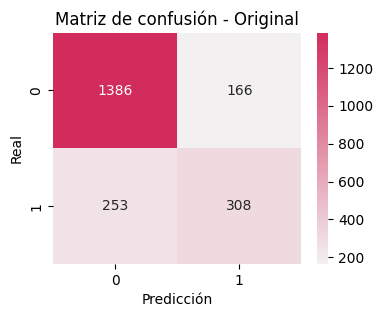


 Resultados SMOTE
Mejores parámetros: {'clf__C': 0.01, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
ACCURACY  -> Mean: 0.740 | Std: 0.008 | 95% CI: (0.727, 0.745)
PRECISION -> Mean: 0.506 | Std: 0.009 | 95% CI: (0.490, 0.513)
RECALL    -> Mean: 0.801 | Std: 0.021 | 95% CI: (0.766, 0.820)
F1        -> Mean: 0.620 | Std: 0.013 | 95% CI: (0.598, 0.628)
ROC_AUC   -> Mean: 0.839 | Std: 0.011 | 95% CI: (0.821, 0.850)


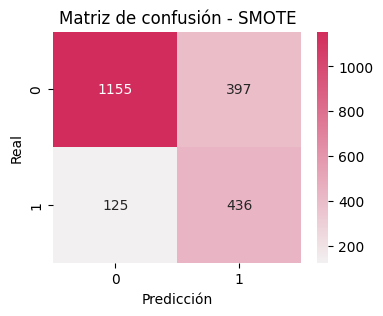


 Resultados RL_NearMiss
Mejores parámetros: {'clf__C': 0.01, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
ACCURACY  -> Mean: 0.616 | Std: 0.021 | 95% CI: (0.583, 0.642)
PRECISION -> Mean: 0.393 | Std: 0.017 | 95% CI: (0.365, 0.412)
RECALL    -> Mean: 0.820 | Std: 0.037 | 95% CI: (0.768, 0.871)
F1        -> Mean: 0.531 | Std: 0.022 | 95% CI: (0.495, 0.550)
ROC_AUC   -> Mean: 0.744 | Std: 0.028 | 95% CI: (0.700, 0.772)


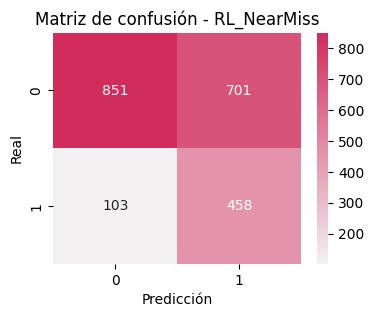

In [31]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

# Caso original (sin balanceo)
grid_original_rl, metricas_original_rl = evaluar_modelo("Original", X_train_sel, y_train)

# Caso balanceado con oversampling (SMOTE)
#X_res_smote, y_res_smote = SMOTE(random_state=61).fit_resample(X_train_sel, y_train)
#grid_smote_rl, metricas_smote_rl = evaluar_modelo("SMOTE", X_res_smote, y_res_smote)
grid_smote_rl, metricas_smote_rl = evaluar_modelo("SMOTE", X_train_sel, y_train, sampler=SMOTE(random_state=61))


# Caso balanceado con undersampling (NearMiss)
#X_res_nm, y_res_nm = NearMiss().fit_resample(X_train_sel, y_train)
#grid_nm_rl, metricas_nm_rl = evaluar_modelo("NearMiss", X_res_nm, y_res_nm)
grid_nm_rl, metricas_nm_rl = evaluar_modelo("RL_NearMiss", X_train_sel, y_train, sampler=NearMiss())



Comparación final

In [32]:
resultados_grid_rl = pd.DataFrame({
    "Original": {m: v["mean"] for m, v in metricas_original_rl.items()},
    "SMOTE":    {m: v["mean"] for m, v in metricas_smote_rl.items()},
    "NearMiss": {m: v["mean"] for m, v in metricas_nm_rl.items()}
})

print("\n Comparación final de métricas (medias en CV):")
print(resultados_grid_rl)

# Elegimos el mejor modelo según Recall
mejor_modelo = resultados_grid_rl.loc["recall"].idxmax()
print(f"\n\n El mejor modelo en términos de Recall fue: {mejor_modelo}")


 Comparación final de métricas (medias en CV):
           Original     SMOTE  NearMiss
accuracy   0.797769  0.739959  0.615619
precision  0.631972  0.506233  0.392798
recall     0.568047  0.801205  0.820350
f1         0.598085  0.620418  0.531127
roc_auc    0.841344  0.839291  0.744043


 El mejor modelo en términos de Recall fue: NearMiss


In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from sklearn.preprocessing import StandardScaler

# Cargar y preparar los datos (asumiendo que 'df' ya existe)
X = df.drop("Abandono", axis=1)
y = df["Abandono"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=61
)

X_train_sel = X_train[mejores_features_rl]
X_test_sel = X_test[mejores_features_rl]

X_res_smote, y_res_smote = NearMiss().fit_resample(X_train_sel, y_train)
#X_test_smote, y_test_smote = SMOTE(random_state=61).fit_resample(X_test_sel, y_test)

# Para este ejemplo, escalamos los datos para la Regresión Logística
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_res_smote)
X_test_scaled = scaler.transform(X_test_sel)

# Entrenamos el modelo
model = LogisticRegression(max_iter=500, solver="liblinear", random_state=61)
model.fit(X_train_scaled, y_res_smote)

# Evaluamos el modelo en ambos conjuntos, usando el Recall para la clase de abandono (1)
recall_train = recall_score(y_res_smote, model.predict(X_train_scaled), pos_label=1)
recall_test = recall_score(y_test, model.predict(X_test_scaled), pos_label=1)

print(f"Recall en conjunto de entrenamiento: {recall_train:.4f}")
print(f"Recall en conjunto de prueba: {recall_test:.4f}")

# Diagnóstico
if recall_test < 0.6 and recall_train < 0.6:
    print("\nEl modelo podría tener UNDERFITTING.")
elif recall_train > recall_test + 0.1:  # Si la diferencia es grande (ej. > 10%)
    print("\nEl modelo podría tener OVERFITTING.")
else:
    print("\nEl modelo parece tener un buen ajuste.")

Recall en conjunto de entrenamiento: 0.7714
Recall en conjunto de prueba: 0.7522

El modelo parece tener un buen ajuste.


**Definición de Función para graficar Curva ROC**

In [34]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

def graficar_curva_roc(modelos, nombres, X_test, y_test, colores, titulo="Curvas ROC", archivo_salida=None):
    """
    Grafica curvas ROC para varios modelos y opcionalmente guarda la imagen.

    Parámetros:
    - modelos: lista de modelos entrenados (con predict_proba)
    - nombres: lista con los nombres de los modelos
    - X_test: features de test
    - y_test: etiquetas de test
    - colores: lista de colores para cada curva
    - titulo: título del gráfico
    - archivo_salida: nombre para guardar la imagen
    """
    plt.figure(figsize=(8,6))

    for modelo, nombre, color in zip(modelos, nombres, colores):
        # Probabilidades de clase positiva
        y_proba = modelo.predict_proba(X_test)[:,1]

        fpr, tpr, _ = roc_curve(y_test, y_proba)
        auc = roc_auc_score(y_test, y_proba)

        plt.plot(fpr, tpr, lw=2, color=color, label=f"{nombre} (AUC = {auc:.3f})")

    # Línea baseline (clasificador aleatorio)
    plt.plot([0,1], [0,1], color="gray", linestyle="--", lw=1, label="Baseline")


    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.title(titulo)
    plt.legend(loc="lower right")
    plt.grid(alpha=0.3)

    if archivo_salida:
        plt.savefig(archivo_salida, dpi=300, bbox_inches="tight")
        print(f"Gráfico guardado como {archivo_salida}")

    plt.show()


**Gráfica Curva ROC**

Gráfico guardado como grafico_curva_roc_rl.png


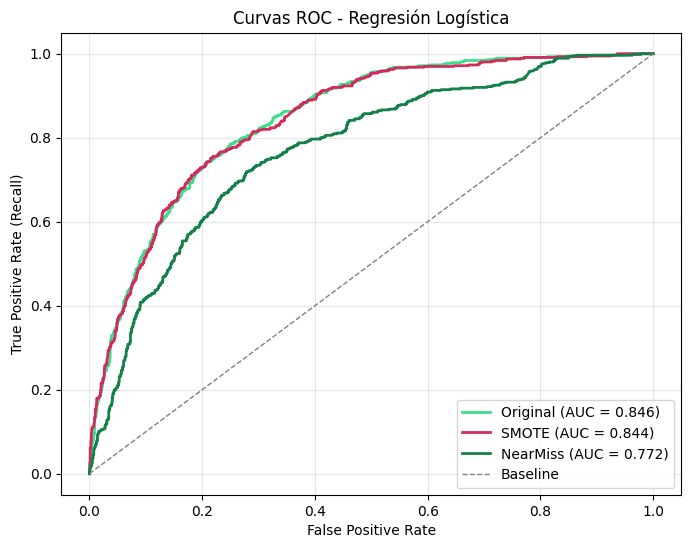

In [35]:
mejores_modelos_rl = [
    grid_original_rl.best_estimator_,
    grid_smote_rl.best_estimator_,
    grid_nm_rl.best_estimator_
]
nombres_rl = ["Original", "SMOTE", "NearMiss"]
colores_rl = ["#3DDD8A", "#D22C5C", "#14814A"]

graficar_curva_roc(mejores_modelos_rl, nombres_rl, X_test_sel, y_test, colores_rl,
                   titulo="Curvas ROC - Regresión Logística", archivo_salida="grafico_curva_roc_rl.png")

**Definición de Función para graficar Curva de precisión x sensibilidad**

In [36]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

def graficar_curva_pr(modelos, nombres, X_test, y_test, colores, titulo="Curvas Precision-Recall", archivo_salida=None):
    """
    Grafica curvas Precision-Recall para varios modelos.

    Parámetros:
    - modelos: lista de modelos entrenados (con predict_proba)
    - nombres: lista con los nombres de los modelos
    - X_test: features de test
    - y_test: etiquetas de test
    - colores: lista de colores para cada curva
    - titulo: título del gráfico
    - archivo_salida: nombre para guardar la imagen
    """
    plt.figure(figsize=(8,6))

    for modelo, nombre, color in zip(modelos, nombres, colores):
        # Probabilidades de clase positiva
        y_proba = modelo.predict_proba(X_test)[:,1]

        precision, recall, _ = precision_recall_curve(y_test, y_proba)
        ap = average_precision_score(y_test, y_proba)

        plt.plot(recall, precision, lw=2, color=color, label=f"{nombre} (AP = {ap:.3f})")

    # Línea baseline = proporción de positivos en los datos
    baseline = y_test.mean()
    plt.hlines(baseline, 0, 1, color="gray", linestyle="--", lw=1,
               label=f"Baseline = {baseline:.2f}")


    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(titulo)
    plt.legend(loc="upper right")
    plt.grid(alpha=0.3)

    if archivo_salida:
        plt.savefig(archivo_salida, dpi=300, bbox_inches="tight")
        print(f"Gráfico guardado como {archivo_salida}")

    plt.show()

**Gráfica Curva de precisión x sensibilidad**

Gráfico guardado como grafico_curva_precall_rl.png


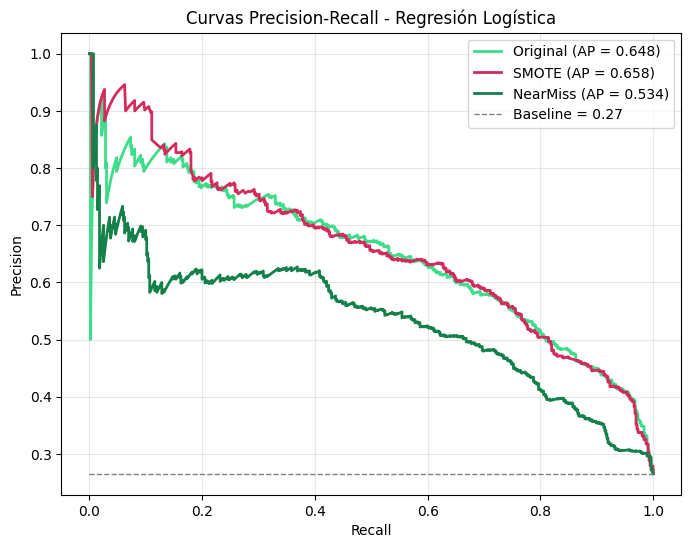

In [37]:
mejores_modelos_rl = [
    grid_original_rl.best_estimator_,
    grid_smote_rl.best_estimator_,
    grid_nm_rl.best_estimator_
]
nombres_rl = ["Original", "SMOTE", "NearMiss"]
colores_rl = ["#3DDD8A", "#D22C5C", "#14814A"]

graficar_curva_pr(mejores_modelos_rl, nombres_rl, X_test_sel, y_test, colores_rl,
                  titulo="Curvas Precision-Recall - Regresión Logística", archivo_salida="grafico_curva_precall_rl.png")

##**RANDOM FOREST**

*Modelo de ensamblado basado en múltiples árboles de decisión.

*Mayor capacidad predictiva, robusto frente a ruido.

*Permite extraer la importancia de las variables en la predicción.

In [38]:
X = df_cleaned.drop("Abandono", axis=1)
y = df_cleaned["Abandono"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=61)

Entrenar modelo inicial para obtener importancia de features

In [39]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=200, max_depth=None, random_state=61)

rf_model.fit(X_train, y_train)



RandomForestClassifier(n_estimators=200, random_state=61)

Guardar importancia de las variables

In [40]:
feature_importances = pd.DataFrame({
    "Features": X.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False).reset_index(drop=True)

print("Características más importantes según Random Forest:")
print(feature_importances.head(20))

Características más importantes según Random Forest:
                                 Features  Importance
0                        Antiguedad_Meses    0.207231
1                        Cargos_Mensuales    0.197397
2                 Contrato_Month-to-month    0.053844
3                     Seguridad_Online_No    0.040561
4                           Genero_Female    0.033889
5                      Soporte_Tecnico_No    0.032953
6            Metodo_Pago_Electronic check    0.030298
7                   Facturacion_Sin_Papel    0.029149
8                                  Pareja    0.027577
9                            Adulto_Mayor    0.026171
10          Servicio_Internet_Fiber optic    0.025212
11                           Dependientes    0.023342
12                      Contrato_Two year    0.021603
13              Copia_Seguridad_Online_No    0.018991
14              Proteccion_Dispositivo_No    0.018704
15                    Multiples_Lineas_No    0.016825
16                   Multiple

**Evaluación con Validación Cruzada**

In [41]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

resultados = pd.DataFrame(index=["Accuracy_Mean", "Accuracy_Std",
                                 "Precision_Mean", "Precision_Std",
                                 "Recall_Mean", "Recall_Std",
                                 "F1_Mean", "F1_Std",
                                 "ROC_AUC_Mean", "ROC_AUC_Std"])

# Define el rango de características a probar.
ct_features = list(range(10, 14))

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=61)

for k in ct_features:
    selected_features = feature_importances["Features"].values[:k]

    X_train_sel = X_train[selected_features]

    model = RandomForestClassifier(
        n_estimators=200, max_depth=None, random_state=61
    )

    # Realiza la validación cruzada para cada métrica.
    acc = cross_val_score(model, X_train_sel, y_train, scoring="accuracy", cv=cv)
    prec = cross_val_score(model, X_train_sel, y_train, scoring=make_scorer(precision_score, pos_label=1), cv=cv)
    rec = cross_val_score(model, X_train_sel, y_train, scoring="recall", cv=cv)
    f1 = cross_val_score(model, X_train_sel, y_train, scoring="f1", cv=cv)
    roc = cross_val_score(model, X_train_sel, y_train, scoring="roc_auc", cv=cv)


    resultados[k] = [
        acc.mean(), acc.std(),
        prec.mean(), prec.std(),
        rec.mean(), rec.std(),
        f1.mean(), f1.std(),
        roc.mean(), roc.std()
    ]

In [42]:
# Resultados

# Muestra el DataFrame completo de resultados comparativos.
print("\n Resultados comparativos (todas las métricas):")
print(resultados)

# Identifica el número de características que dio el mejor 'Recall_Mean'.
mejor_k = resultados.loc["Recall_Mean"].idxmax()

print(f"\n\n El mejor rendimiento para retener clientes se obtuvo con {mejor_k} características (según Recall).")


 Resultados comparativos (todas las métricas):
                      10        11        12        13
Accuracy_Mean   0.780933  0.781744  0.783976  0.782150
Accuracy_Std    0.009916  0.011921  0.010904  0.007353
Precision_Mean  0.610455  0.608593  0.620522  0.614171
Precision_Std   0.021981  0.026443  0.026873  0.016529
Recall_Mean     0.479316  0.494601  0.477804  0.480091
Recall_Std      0.031615  0.035194  0.023330  0.024254
F1_Mean         0.536848  0.545526  0.539867  0.538792
F1_Std          0.028192  0.031541  0.024834  0.021182
ROC_AUC_Mean    0.813738  0.814241  0.813301  0.818044
ROC_AUC_Std     0.010693  0.010297  0.008058  0.010768


 El mejor rendimiento para retener clientes se obtuvo con 11 características (según Recall).


**Selección de features óptimas** (según Recall)

In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

mejor_k = resultados.loc["Recall_Mean"].idxmax()

mejores_features_rf = feature_importances["Features"].values[:mejor_k].tolist()

X_train_sel_rf = X_train[mejores_features_rf]
X_test_sel_rf  = X_test[mejores_features_rf]

**Optimización de Hiperparámetros y Evaluación**

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, cross_val_score
from imblearn.pipeline import Pipeline
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score)
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
import matplotlib.pyplot as plt
import seaborn as sns

# Define el espacio de búsqueda del Random Forest.
param_grid = {
    "clf__n_estimators": [100, 200, 300], # Número de árboles en el bosque.
    "clf__max_depth": [None, 5, 10, 20],   # Profundidad máxima de los árboles.
    "clf__min_samples_split": [2, 5, 10],   # Mínimo de muestras para dividir un nodo.
    "clf__min_samples_leaf": [1, 2, 4],     # Mínimo de muestras en un nodo hoja.
    "clf__bootstrap": [True, False]         # Método de muestreo de bootstrap.
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=61)

def evaluar_modelo(nombre, X, y, sampler=None):
    steps = []
    if sampler is not None:
        steps.append(("sampler", sampler))

    steps.append(("clf", RandomForestClassifier(random_state=61)))

    pipeline = Pipeline(steps=steps)

    # RandomizedSearchCV busca la mejor combinación de parámetros de forma más rápida
    random_search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=param_grid,
        n_iter=50,  # Probar 50 combinaciones al azar.
        scoring="recall",
        cv=cv,
        n_jobs=-1,
        random_state=61
    )
    random_search.fit(X, y)

    best_model = random_search.best_estimator_

    metricas = {}

    for score in ["accuracy", "precision", "recall", "f1", "roc_auc"]:

        scores = cross_val_score(best_model, X, y, cv=cv, scoring=score)
        media = scores.mean()
        std = scores.std()
        ci_inf, ci_sup = np.percentile(scores, [2.5, 97.5])

        metricas[score] = {
            "mean": media,
            "std": std,
            "ci": (ci_inf, ci_sup)
        }


    y_pred = best_model.predict(X_test_sel_rf)
    cm = confusion_matrix(y_test, y_pred)

    print(f"\n Resultados {nombre}")
    print("Mejores parámetros:", random_search.best_params_)
    for m, valores in metricas.items():
        print(f"{m.upper():<9} -> "
              f"Mean: {valores['mean']:.3f} | "
              f"Std: {valores['std']:.3f} | "
              f"95% CI: ({valores['ci'][0]:.3f}, {valores['ci'][1]:.3f})")

    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt="d", cmap=sns.light_palette("#14814A", as_cmap=True))
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.title(f"Matriz de confusión - {nombre}")
    plt.savefig(f"matriz_confusion_{nombre}_rf.png", dpi=300, bbox_inches="tight")
    plt.show()

    return random_search, metricas

**Ejecución y comparación**


 Resultados Original
Mejores parámetros: {'clf__n_estimators': 300, 'clf__min_samples_split': 5, 'clf__min_samples_leaf': 1, 'clf__max_depth': 10, 'clf__bootstrap': False}
ACCURACY  -> Mean: 0.797 | Std: 0.013 | 95% CI: (0.779, 0.815)
PRECISION -> Mean: 0.646 | Std: 0.031 | 95% CI: (0.602, 0.690)
RECALL    -> Mean: 0.519 | Std: 0.025 | 95% CI: (0.485, 0.548)
F1        -> Mean: 0.575 | Std: 0.026 | 95% CI: (0.537, 0.610)
ROC_AUC   -> Mean: 0.832 | Std: 0.008 | 95% CI: (0.820, 0.841)


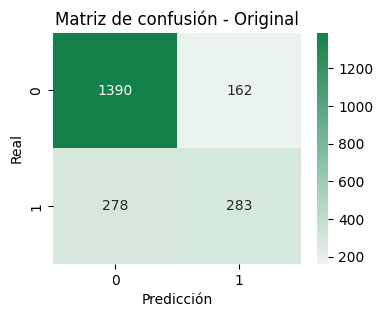


 Resultados SMOTE
Mejores parámetros: {'clf__n_estimators': 200, 'clf__min_samples_split': 2, 'clf__min_samples_leaf': 1, 'clf__max_depth': 5, 'clf__bootstrap': True}
ACCURACY  -> Mean: 0.758 | Std: 0.012 | 95% CI: (0.741, 0.775)
PRECISION -> Mean: 0.532 | Std: 0.016 | 95% CI: (0.508, 0.554)
RECALL    -> Mean: 0.728 | Std: 0.035 | 95% CI: (0.681, 0.775)
F1        -> Mean: 0.614 | Std: 0.022 | 95% CI: (0.582, 0.646)
ROC_AUC   -> Mean: 0.830 | Std: 0.009 | 95% CI: (0.815, 0.838)


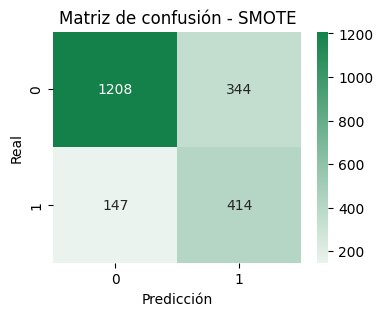


 Resultados NearMiss
Mejores parámetros: {'clf__n_estimators': 200, 'clf__min_samples_split': 2, 'clf__min_samples_leaf': 1, 'clf__max_depth': 5, 'clf__bootstrap': True}
ACCURACY  -> Mean: 0.646 | Std: 0.054 | 95% CI: (0.576, 0.707)
PRECISION -> Mean: 0.417 | Std: 0.042 | 95% CI: (0.364, 0.463)
RECALL    -> Mean: 0.774 | Std: 0.055 | 95% CI: (0.679, 0.822)
F1        -> Mean: 0.540 | Std: 0.033 | 95% CI: (0.499, 0.574)
ROC_AUC   -> Mean: 0.762 | Std: 0.024 | 95% CI: (0.734, 0.795)


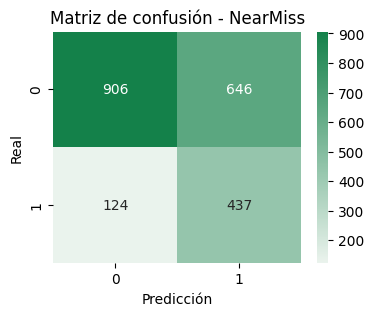

In [45]:
# Evalúa el escenario con los datos originales.
grid_original_rf, metricas_original_rf = evaluar_modelo("Original", X_train_sel_rf, y_train)

# Aplica SMOTE para sobremuestreo y evalúa el modelo.
#X_res_smote, y_res_smote = SMOTE(random_state=61).fit_resample(X_train_sel_rf, y_train)
#grid_smote_rf, metricas_smote_rf = evaluar_modelo("SMOTE", X_res_smote, y_res_smote)
grid_smote_rf, metricas_smote_rf = evaluar_modelo("SMOTE", X_train_sel_rf, y_train, sampler=SMOTE(random_state=61))

# Aplica NearMiss para submuestreo y evalúa el modelo.
#X_res_nm, y_res_nm = NearMiss().fit_resample(X_train_sel_rf, y_train)
#grid_nm_rf, metricas_nm_rf = evaluar_modelo("NearMiss", X_res_nm, y_res_nm)
grid_nm_rf, metricas_nm_rf = evaluar_modelo("NearMiss", X_train_sel_rf, y_train, sampler=NearMiss())



In [46]:
resultados_grid = pd.DataFrame({
    "Original": {m: v["mean"] for m, v in metricas_original_rf.items()},
    "SMOTE": {m: v["mean"] for m, v in metricas_smote_rf.items()},
    "NearMiss": {m: v["mean"] for m, v in metricas_nm_rf.items()}
})

print("\n Comparación final de métricas (medias en CV):")
print(resultados_grid)

mejor_modelo = resultados_grid.loc["recall"].idxmax()

print(f"\n\n El mejor modelo en términos de Recall fue: {mejor_modelo}")


 Comparación final de métricas (medias en CV):
           Original     SMOTE  NearMiss
accuracy   0.796755  0.757809  0.646450
precision  0.645664  0.531677  0.417240
recall     0.519107  0.727800  0.774403
f1         0.575409  0.614358  0.539557
roc_auc    0.831797  0.830224  0.761695


 El mejor modelo en términos de Recall fue: NearMiss


In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
from imblearn.under_sampling import NearMiss

# Cargar y preparar los datos (asumiendo que 'df' ya existe)
X = df.drop("Abandono", axis=1)
y = df["Abandono"]

# Dividimos en train y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=61
)

# Selección de features (las que ya definiste previamente)
X_train_sel = X_train[mejores_features_rf]
X_test_sel = X_test[mejores_features_rf]

# Balanceo con NearMiss (undersampling)
X_res_nm, y_res_nm = NearMiss().fit_resample(X_train_sel, y_train)

# Entrenamos el modelo Random Forest
model = RandomForestClassifier(
    n_estimators=200,
    min_samples_split=2,
    min_samples_leaf=1,
    max_depth=5,
    bootstrap=True,
    random_state=61
)
model.fit(X_res_nm, y_res_nm)

# Evaluamos el modelo en entrenamiento y prueba con Recall
recall_train = recall_score(y_res_nm, model.predict(X_res_nm), pos_label=1)
recall_test = recall_score(y_test, model.predict(X_test_sel), pos_label=1)

print(f"Recall en conjunto de entrenamiento: {recall_train:.4f}")
print(f"Recall en conjunto de prueba: {recall_test:.4f}")

# Diagnóstico simple de underfitting / overfitting
if recall_test < 0.6 and recall_train < 0.6:
    print("\nEl modelo podría tener UNDERFITTING.")
elif recall_train > recall_test + 0.1:  # diferencia significativa entre train y test
    print("\nEl modelo podría tener OVERFITTING.")
else:
    print("\nEl modelo parece tener un buen ajuste.")


Recall en conjunto de entrenamiento: 0.8180
Recall en conjunto de prueba: 0.7790

El modelo parece tener un buen ajuste.


**Gráfica Curva ROC**

Gráfico guardado como grafico_curva_roc_rf.png


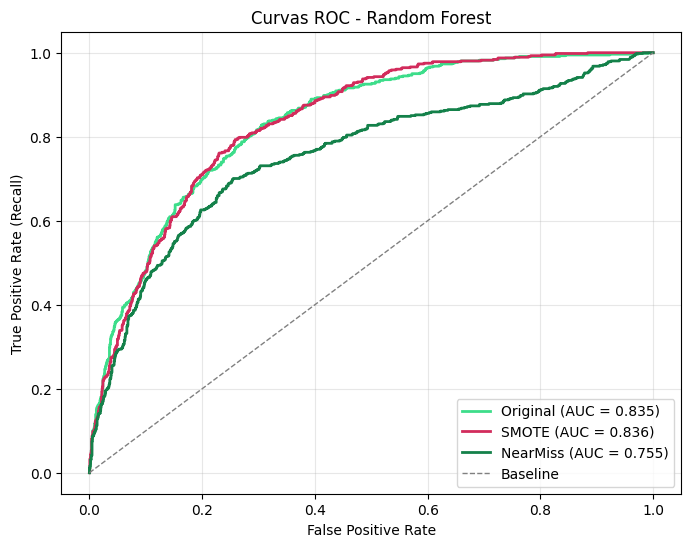

In [48]:
mejores_modelos_rf = [
    grid_original_rf.best_estimator_,
    grid_smote_rf.best_estimator_,
    grid_nm_rf.best_estimator_
]
nombres_rf = ["Original", "SMOTE", "NearMiss"]
colores_rf = ["#3DDD8A", "#D22C5C", "#14814A"]

graficar_curva_roc(mejores_modelos_rf, nombres_rf, X_test_sel, y_test, colores_rf,
                   titulo="Curvas ROC - Random Forest", archivo_salida="grafico_curva_roc_rf.png")


Gráfico guardado como grafico_curva_precall_rf.png


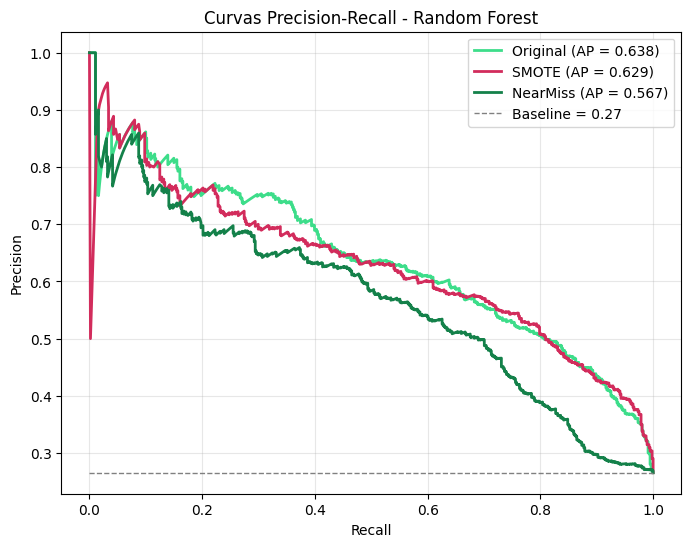

In [49]:
mejores_modelos_rf = [
    grid_original_rf.best_estimator_,
    grid_smote_rf.best_estimator_,
    grid_nm_rf.best_estimator_
]
nombres_rf = ["Original", "SMOTE", "NearMiss"]
colores_rf = ["#3DDD8A", "#D22C5C", "#14814A"]

graficar_curva_pr(mejores_modelos_rf, nombres_rf, X_test_sel, y_test, colores_rf,
                  titulo="Curvas Precision-Recall - Random Forest", archivo_salida="grafico_curva_precall_rf.png")

**Factores de Influencia en el Abandono**

Ambos modelos, a pesar de sus diferentes metodologías, identifican un conjunto similar de variables clave que tienen el mayor impacto en la cancelación de clientes. Los factores se pueden agrupar en categorías para una mejor comprensión:

* **Antigüedad y Contrato**: La **antigüedad del cliente** (`Antiguedad_Meses`) es el factor más importante en la Regresión Logística y el segundo en el Random Forest, con una correlación negativa significativa. Esto significa que a mayor tiempo como cliente, menor es la probabilidad de abandono. El **tipo de contrato** (`Contrato_Month-to-month`) también es un predictor crucial; los clientes con contratos mensuales son mucho más propensos a cancelar.

* **Servicios y Cargos**: Los **cargos mensuales** (`Cargos_Mensuales`) son la segunda variable más importante en ambos modelos. Los clientes con cargos mensuales más altos tienen una mayor probabilidad de abandonar, especialmente si tienen servicios de **fibra óptica**. La ausencia de servicios adicionales, como **soporte técnico** (`Soporte_Tecnico_No`) y **seguridad en línea** (`Seguridad_Online_No`), también se correlaciona con una mayor propensión a la cancelación.

* **Demografía y Pagos**: Aunque con menor impacto que los factores anteriores, variables como el uso de **cheques electrónicos** (`Metodo_Pago_Electronic check`) y la demografía del cliente (si son **Adulto Mayor** o si tienen **Pareja**) también influyen en el riesgo de abandono.

##**Resultados comparativos**

A partir de esta estrategia de modelado predictivo orientada al Recall, se obtuvieron múltiples configuraciones de modelos, cada una con diferentes enfoques de balanceo y optimización de hiperparámetros. En la siguiente sección de **Resultados** se presentan las métricas comparativas, las curvas ROC y Precision-Recall, así como las matrices de confusión de los modelos más relevantes. Estos análisis permiten evaluar de manera integral el desempeño de cada alternativa y fundamentar la elección del modelo champion para la predicción de abandono de clientes en TelecomX.

###**Regresión Logística**

**Comparación final de métricas Regresión Logística**:

|          | Original|SMOTE|NearMiss
|----------|---------|-----|--------
|accuracy  | 0.798 | 0.740 | 0.616
|precision | 0.632 | 0.506 | 0.393
|recall    | 0.568 | 0.801 | 0.820
|f1        | 0.598 | 0.620 | 0.531
|roc_auc   | 0.841 | 0.839 | 0.744


 El mejor modelo en términos de Recall fue: NearMiss

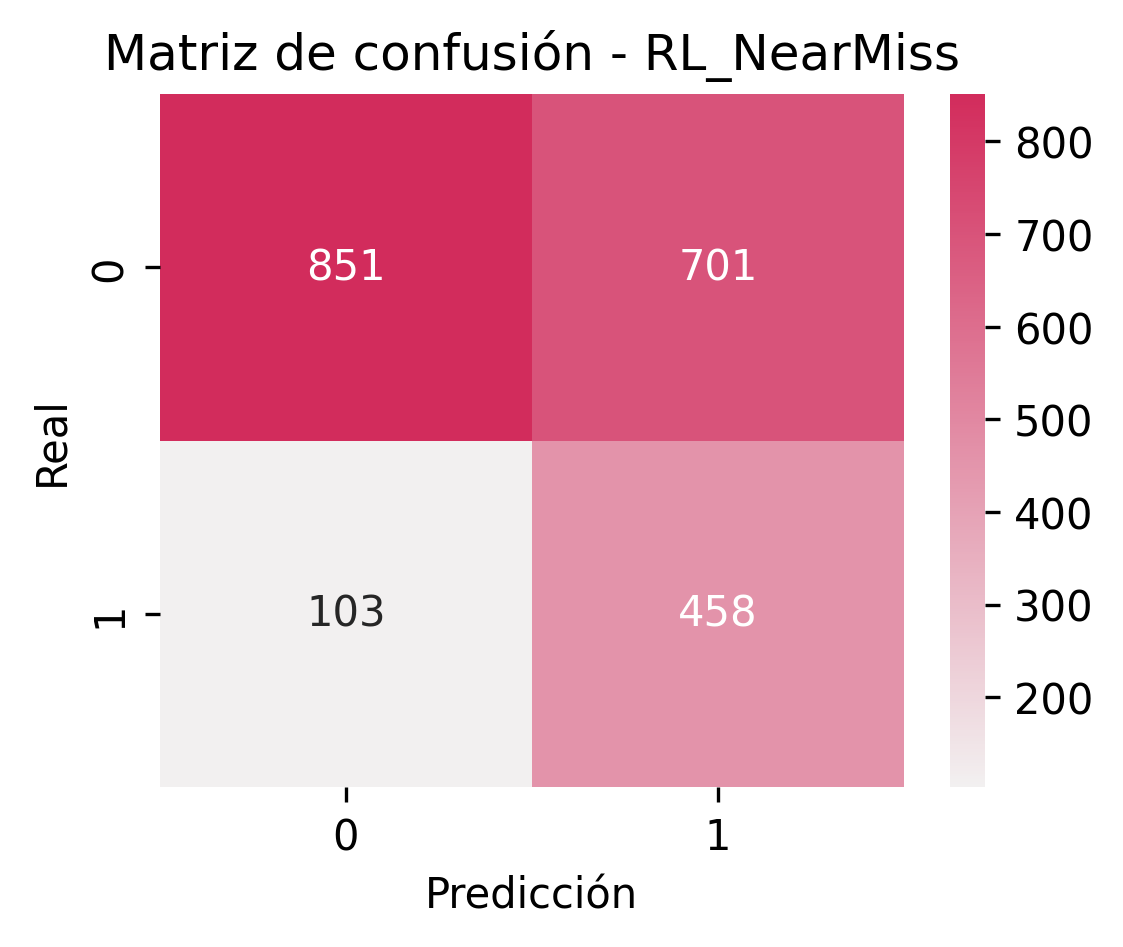

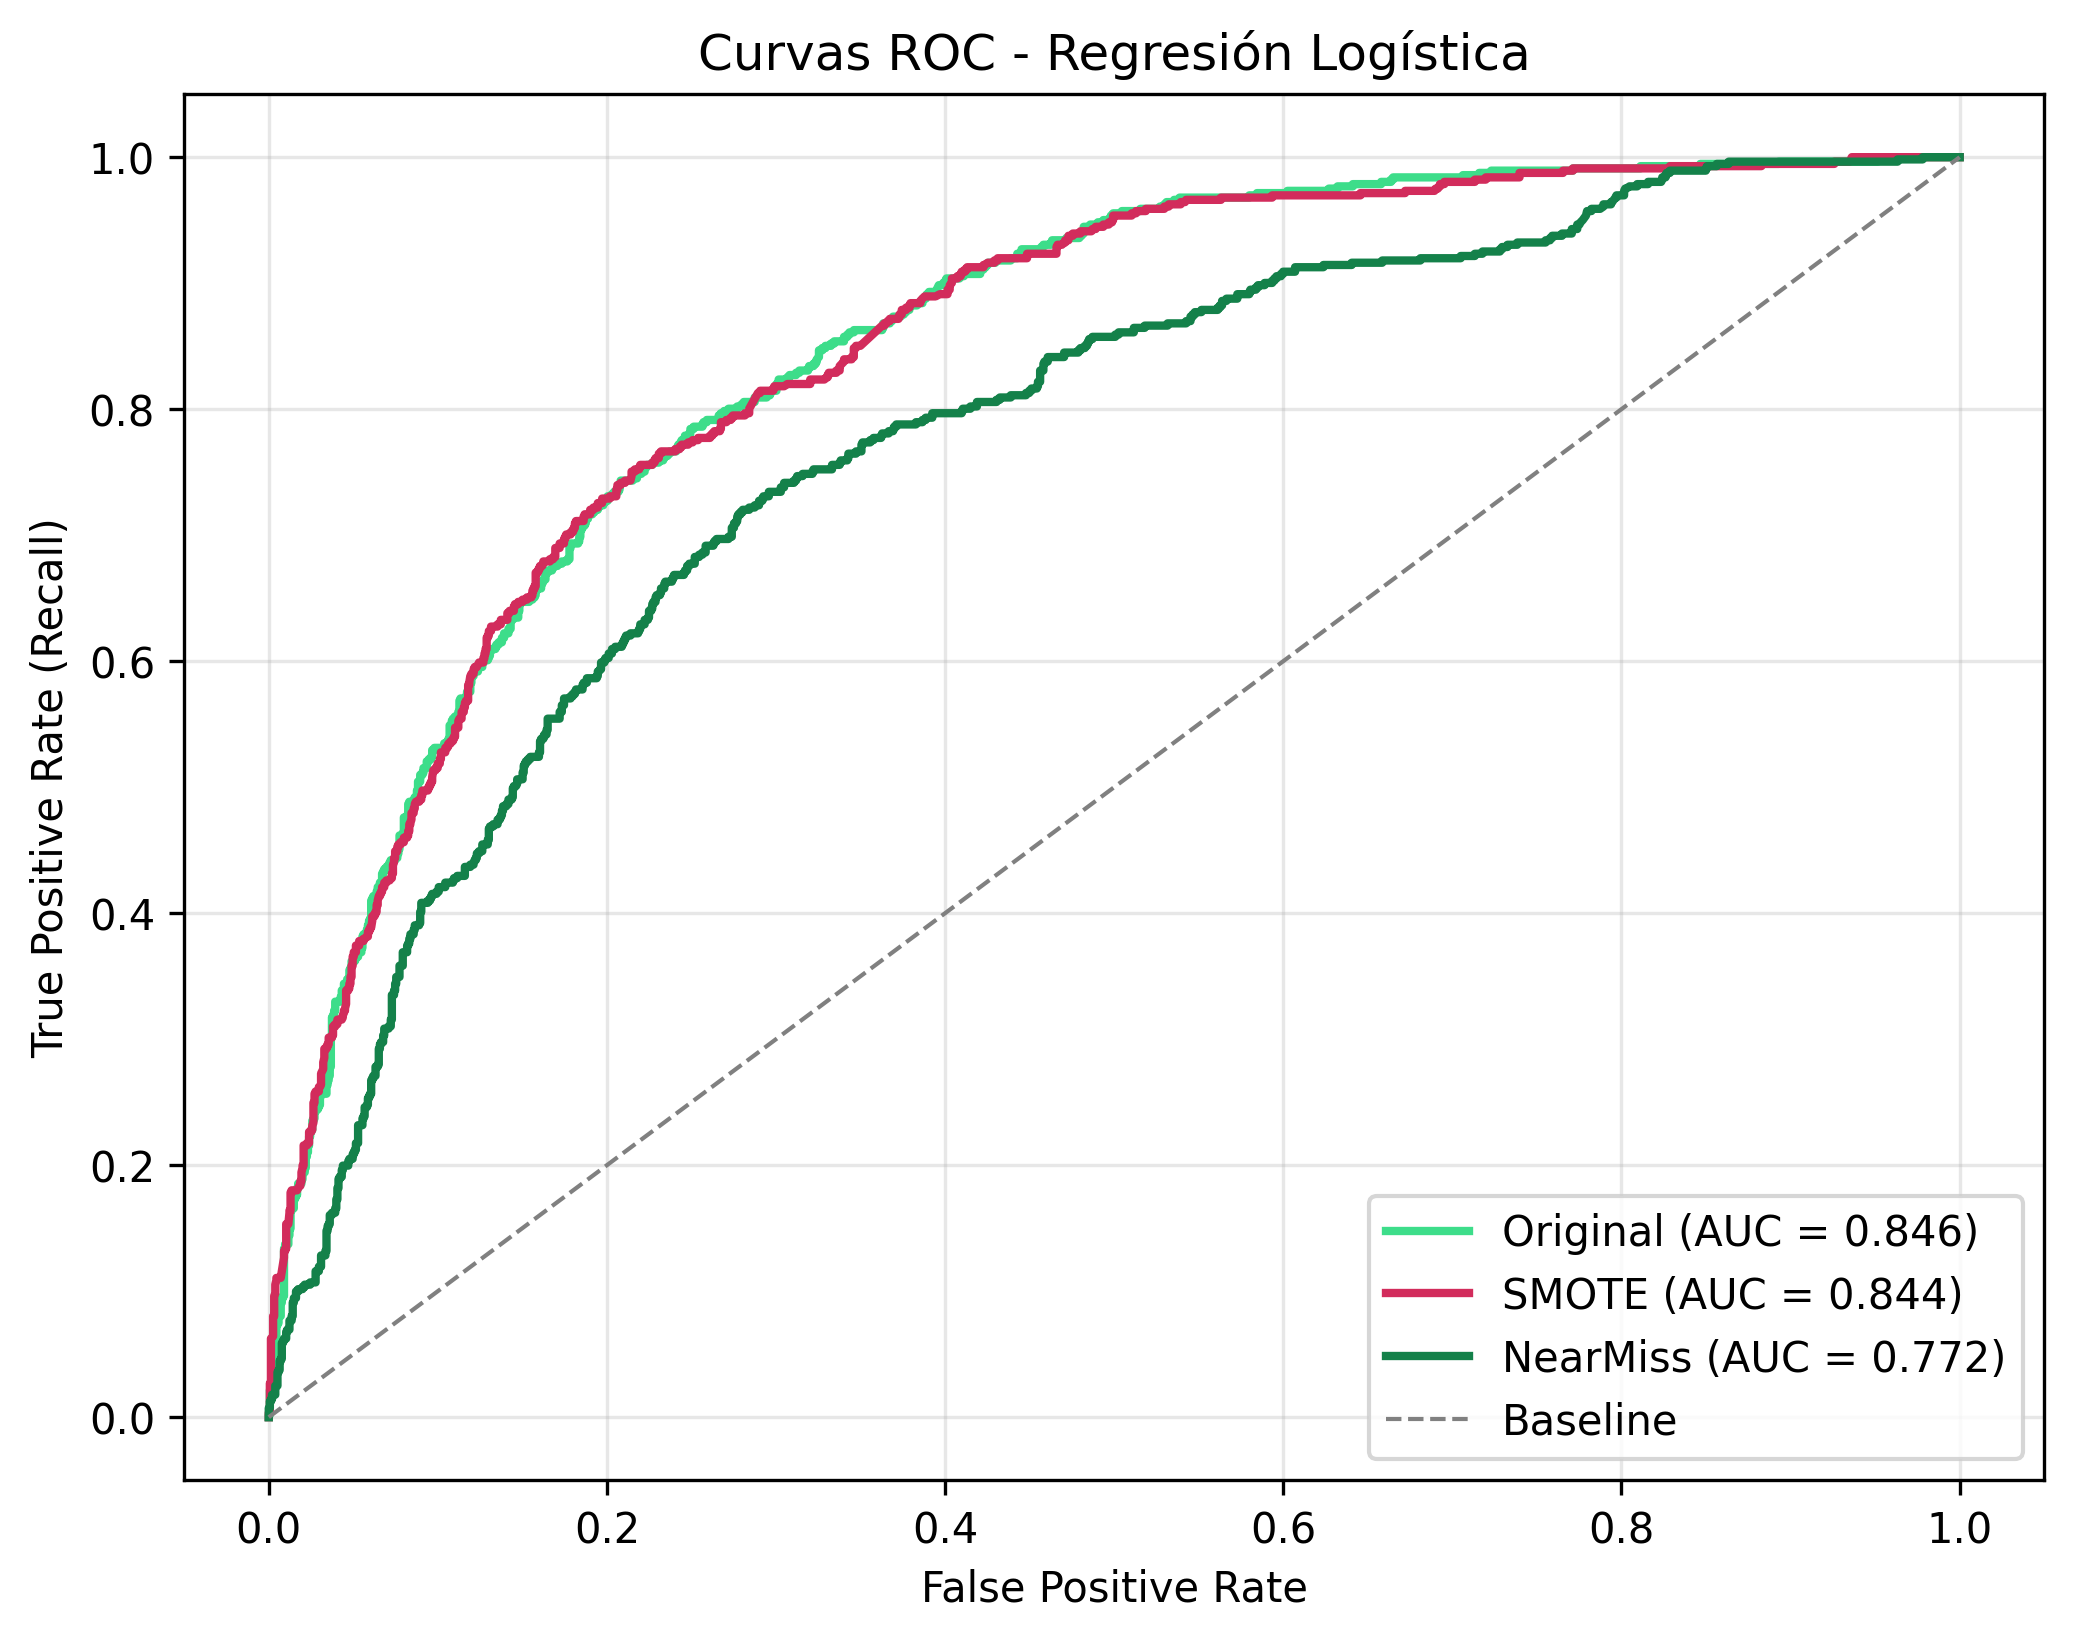

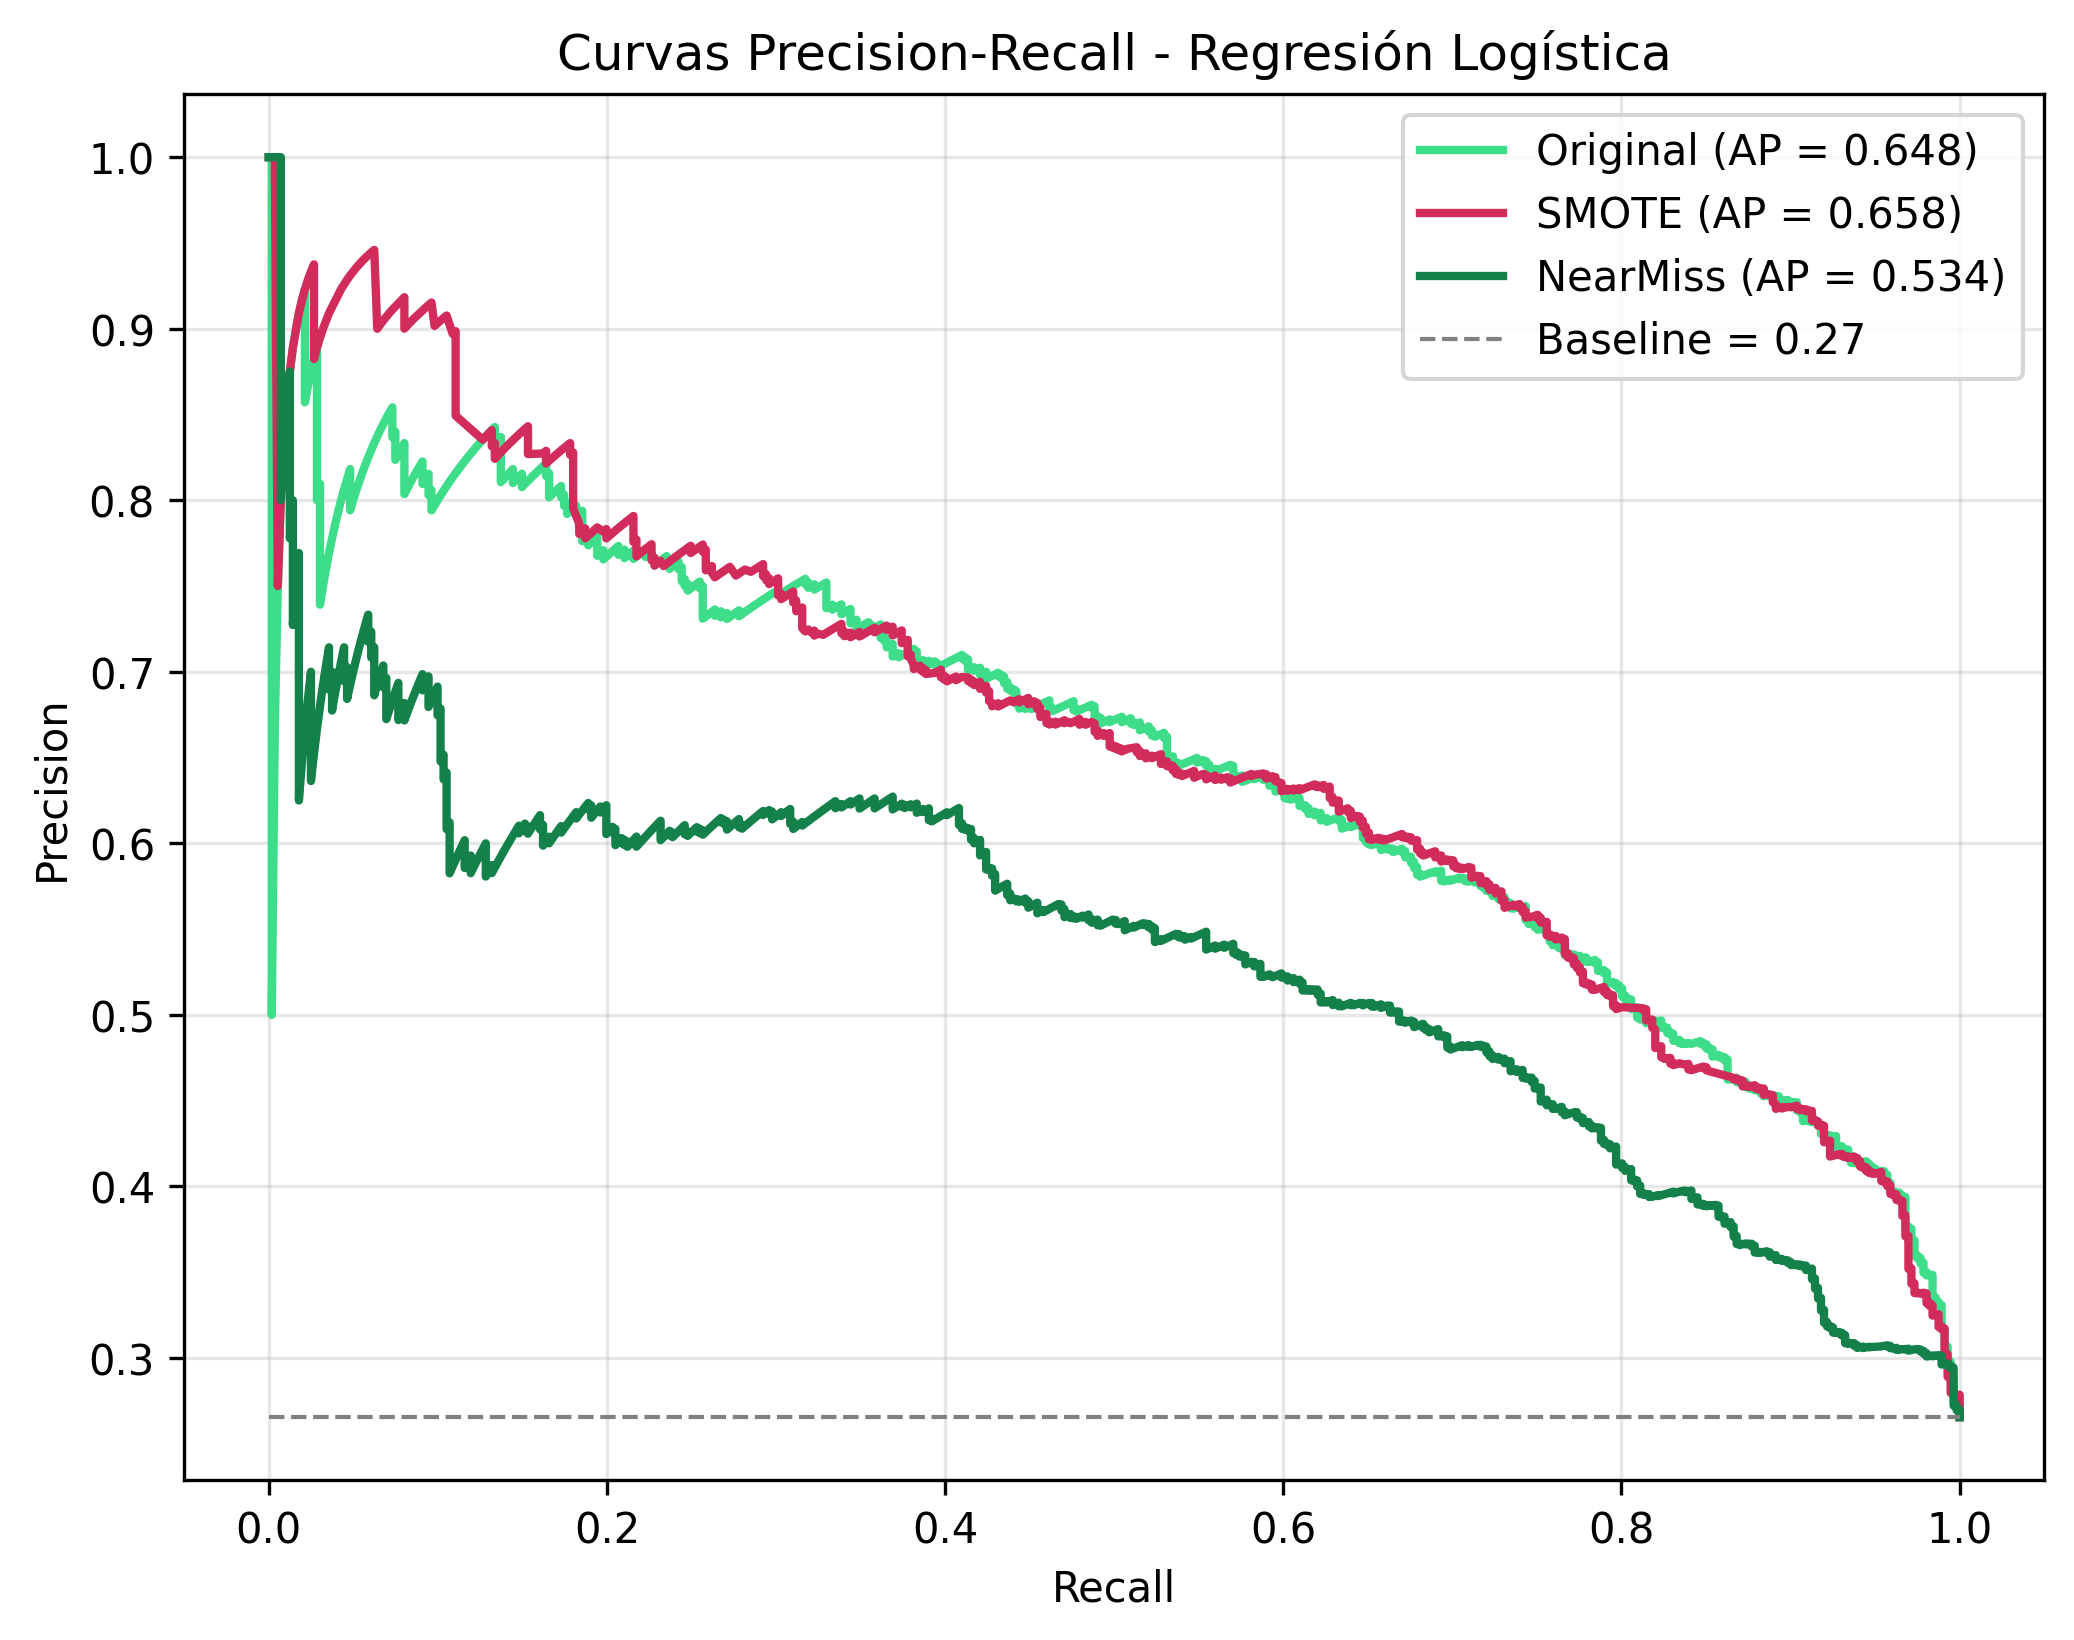

###**Random Forest**

 **Comparación final de métricas Random Forest**:

|          | Original  |  SMOTE|  NearMiss
|----------|----------|-------|---------
|accuracy  | 0.797 | 0.758 | 0.646
|precision | 0.646 | 0.532 | 0.417
|recall    | 0.519 | 0.728 | 0.774
|f1        | 0.575 | 0.614 | 0.540
|roc_auc   | 0.832 | 0.830 | 0.762

 El mejor modelo en términos de Recall fue: NearMiss

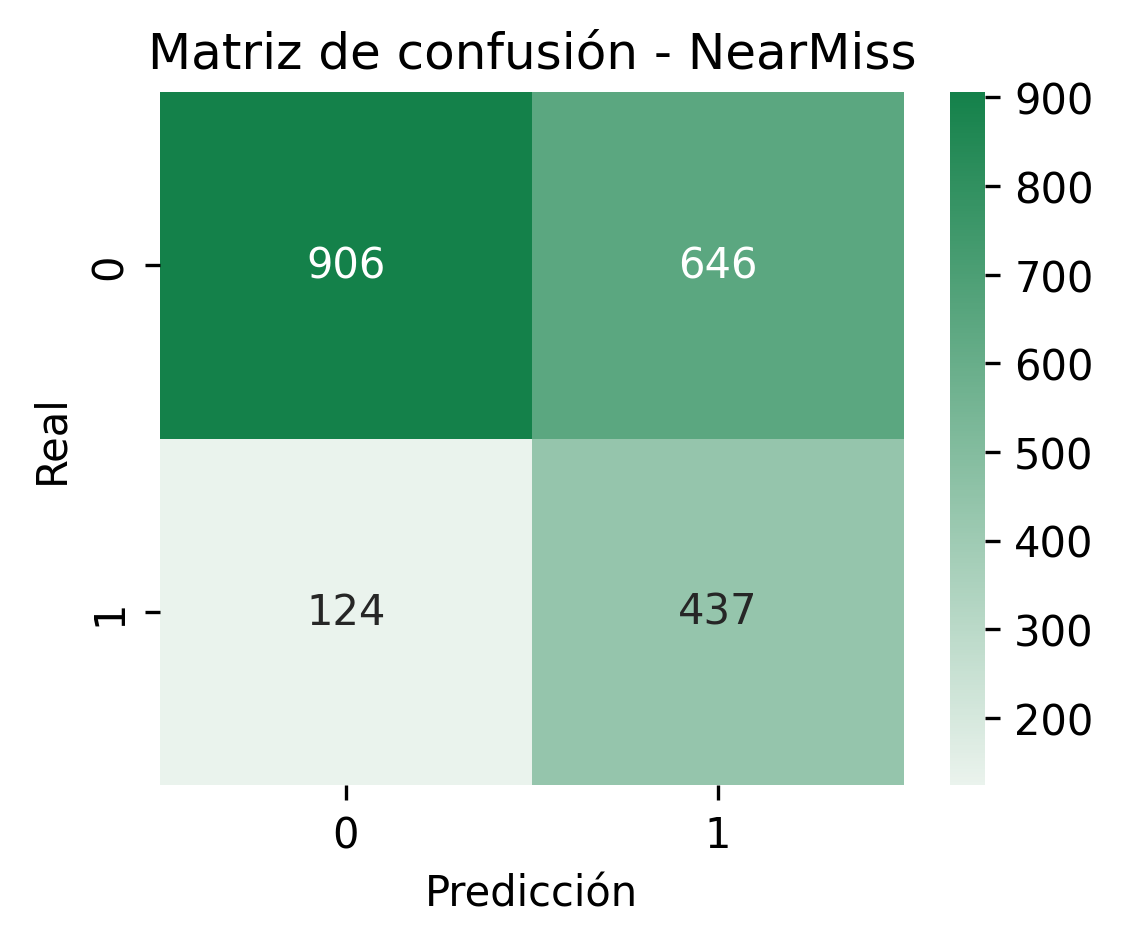

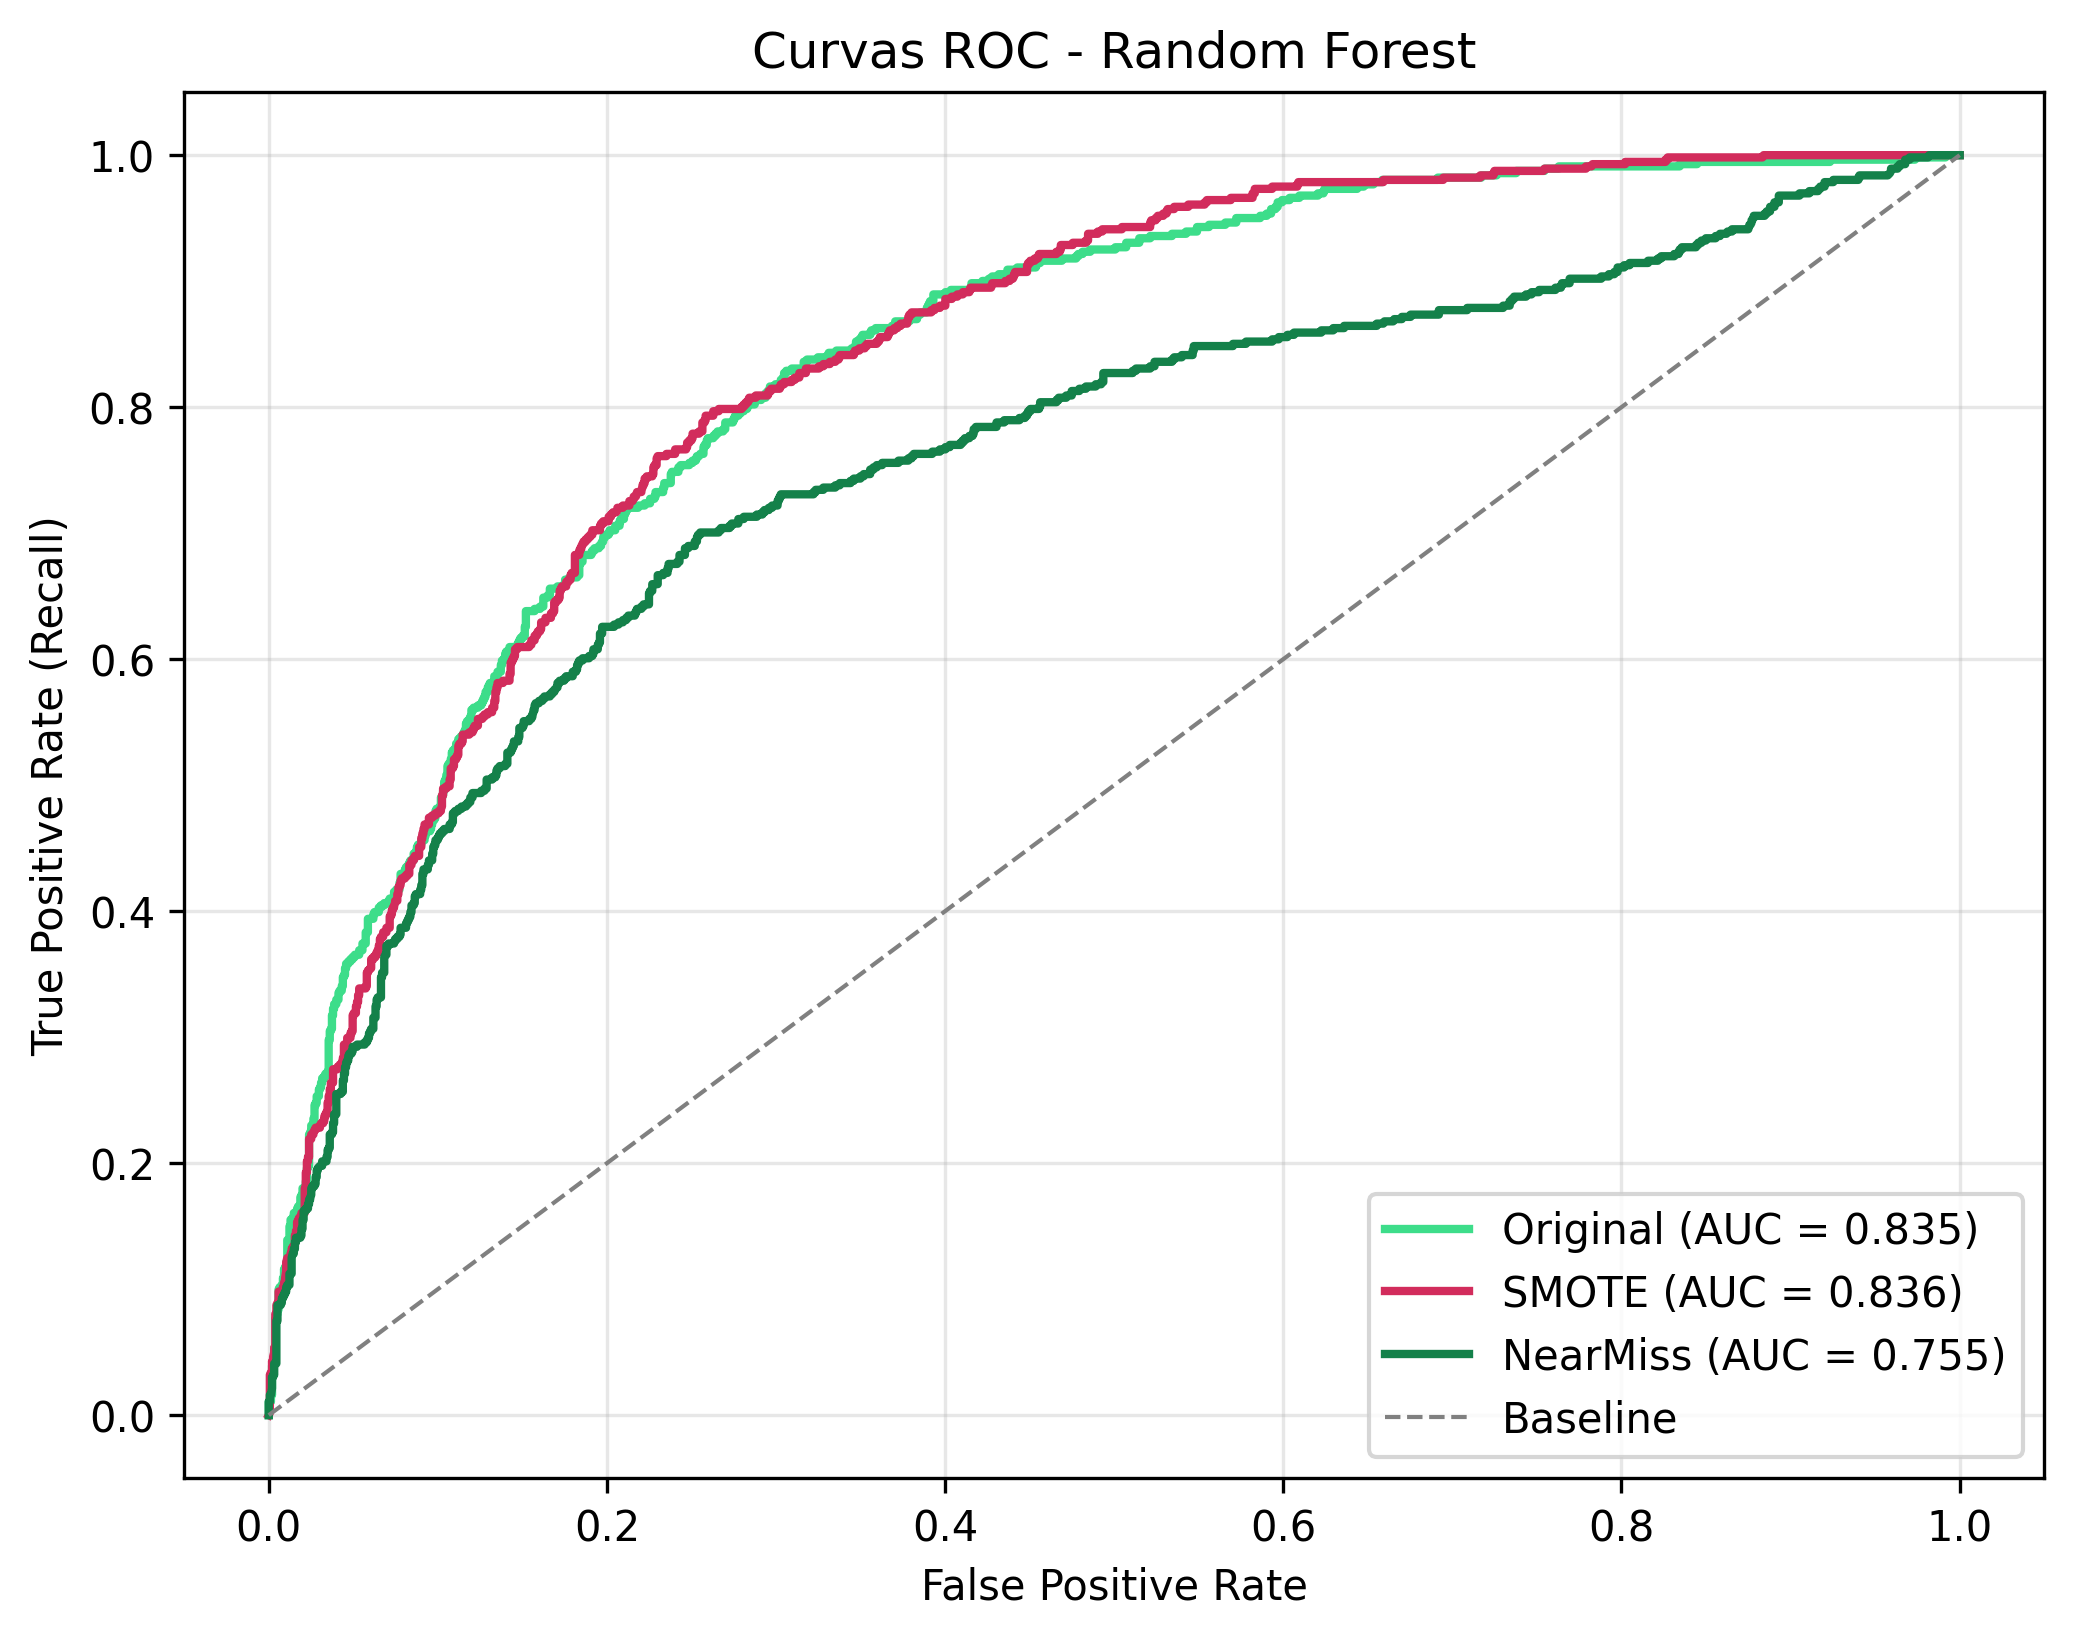

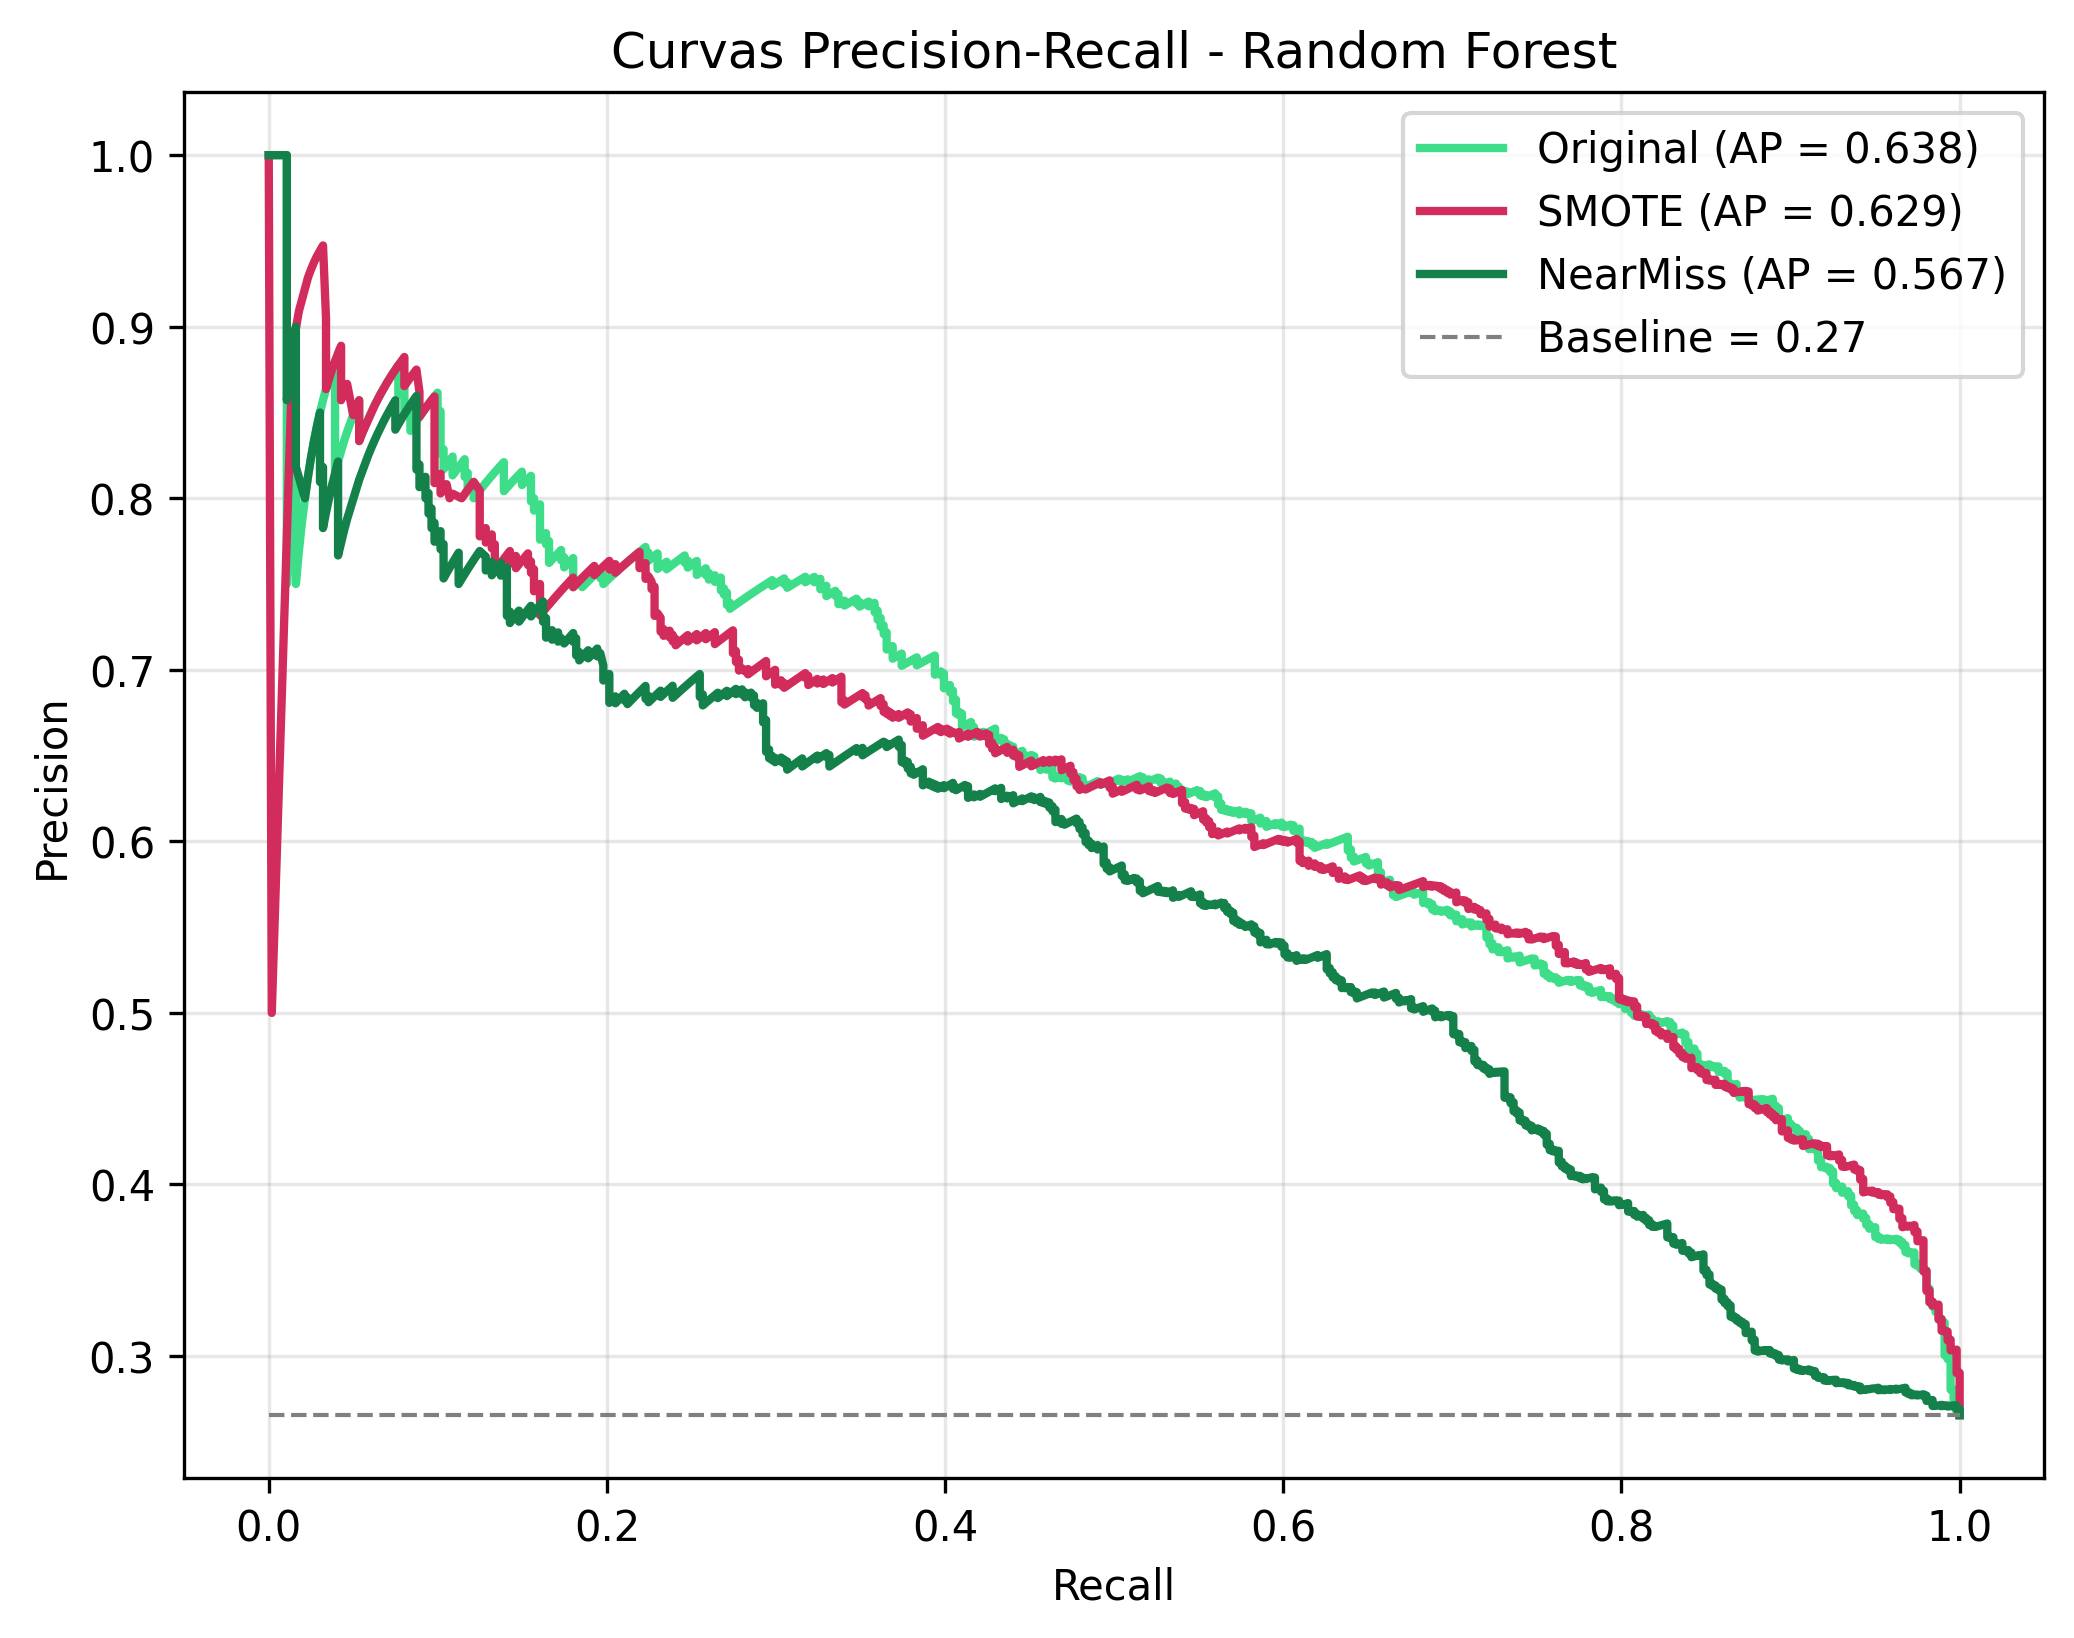

# 📑 Informe: Factores de Cancelación y Estrategias de Retención — TelecomX

## 1) Resumen Ejecutivo

- **Objetivo:** identificar los factores que más influyen en la cancelación (Abandono=1) y proponer acciones de retención.
- **Modelos evaluados:** Regresión Logística (RL) y Random Forest (RF), con y sin técnicas de balanceo (SMOTE y NearMiss).  
- **Métrica prioritaria:** **Recall** (sensibilidad para detectar clientes que cancelan), validado con **CV estratificado (5-fold)**.
- **Hallazgos clave:**
  - Las señales más fuertes provienen de **Antigüedad_Meses (tenure)**, **Cargos_Mensuales**, **tipo de Contrato (Month-to-month vs Two year)**, **método de pago Electronic check**, y **falta de servicios/soporte** (Seguridad_Online_No, Soporte_Tecnico_No).
  - Con RL, el mejor **Recall medio en CV** lo da **NearMiss (0.820)**, seguido de **SMOTE (0.801)**.  
    - RL-SMOTE logra un **equilibrio** superior entre Recall y Precision frente a RL-NearMiss.  
  - Con RF, el mejor **Recall medio en CV** lo da **NearMiss (0.774)**; RF-SMOTE llega a **0.728**.
  - En prueba (hold-out), se observan **Recall ~0.75–0.78** para los mejores escenarios (RL-SMOTE y RF-NearMiss).

**Recomendación de uso operativo (según capacidad):**
- Si priorizamos **maximizar detección** y tolerar falsos positivos: **RL-NearMiss**.  
- Si necesitamos **mejor equilibrio** entre Recall y Precision: **RL-SMOTE** (suele ser más estable en AUC y F1).  
- **RF-NearMiss** es una alternativa sólida si se privilegia interpretabilidad por importancias y robustez a no linealidades.

---

## 2) Variables Seleccionadas y Señal Detectada

Se seleccionaron las **Top features** según importancia en Regresión Logística (ordenadas por |coef|):

1. Antiguedad_Meses  
2. Servicio_Internet_Fiber optic  
3. Cargos_Mensuales  
4. Contrato_Two year  
5. Contrato_Month-to-month  
6. Streaming_Peliculas_Yes  
7. Streaming_TV_Yes  
8. Seguridad_Online_No  
9. Soporte_Tecnico_No  
10. Proteccion_Dispositivo_Yes  
11. Copia_Seguridad_Online_No  
12. Facturacion_Sin_Papel  
13. Servicio_Internet_DSL  
14. Copia_Seguridad_Online_Yes  
15. Proteccion_Dispositivo_No  
16. Metodo_Pago_Electronic check  
17. Adulto_Mayor  
18. Dependientes  
19. Multiples_Lineas_No  
20. Multiples_Lineas_Yes

**Top features en Random Forest (importancias):**
1. Antiguedad_Meses
2. Cargos_Mensuales
3. Contrato_Month-to-month
4. Seguridad_Online_No
5. Genero_Female
6. Soporte_Tecnico_No
7. Metodo_Pago_Electronic check
8. Facturacion_Sin_Papel
9. Pareja, Adulto_Mayor
10. Servicio_Internet_Fiber optic
11. Dependientes
12. Contrato_Two year
13. Copia_Seguridad_Online_No
14. Proteccion_Dispositivo_No
15. Multiples_Lineas_No/Yes
16. Copia_Seguridad_Online_Yes
17. autopagos con tarjeta/banco.

> **Lectura práctica (dirección esperada):**
> - **Menor Antigüedad** → mayor riesgo de churn.  
> - **Cargos Mensuales altos** → mayor riesgo.  
> - **Contrato Month-to-month** (+) vs **Two year** (–).  
> - **Electronic check** se asocia a más churn que **autopagos**.  
> - **No** contar con **Seguridad_Online**/**Soporte_Tecnico** eleva el riesgo.  
> - **Fiber optic** tiende a mayor churn que **DSL** (probable efecto de precio/expectativas).  
> - Variables demográficas (p. ej., Genero, Adulto_Mayor) muestran señal, pero **no se proponen acciones directas** sobre atributos sensibles; se usan solo para diagnóstico agregado.

---

## 3) Desempeño de Modelos (medias en CV, clase positiva = Abandono=1)

### 3.1 Regresión Logística
- **Original:** Acc 0.798 • Prec 0.632 • **Recall 0.568** • F1 0.598 • AUC 0.841  
- **SMOTE:**   Acc 0.740 • Prec 0.506 • **Recall 0.801** • F1 0.620 • AUC 0.839  
- **NearMiss:** Acc 0.616 • Prec 0.393 • **Recall 0.820** • F1 0.531 • AUC 0.744  

**Hold-out (ejemplo RL-SMOTE):** Recall train **0.771** • Recall test **0.752** → buen ajuste.

### 3.2 Random Forest
- **Original:** Acc 0.797 • Prec 0.646 • **Recall 0.519** • F1 0.575 • AUC 0.832  
- **SMOTE:**   Acc 0.758 • Prec 0.532 • **Recall 0.728** • F1 0.614 • AUC 0.830  
- **NearMiss:** Acc 0.646 • Prec 0.417 • **Recall 0.774** • F1 0.540 • AUC 0.762  

**Hold-out (RF-NearMiss):** Recall train **0.818** • Recall test **0.779** → buen ajuste.

> **Conclusión de rendimiento:**  
> - **Mejor Recall:** Regresión Logística-NearMiss (0.820) > Random Forest-NearMiss (0.774) > Regresión Logística-SMOTE (0.801).  
> - **Mejor equilibrio Recall/Precision/AUC:** Regresión Logística-SMOTE.  
> - La elección final debe considerar **capacidad operativa** (falsos positivos) y **coste** de intervención.

---

## 4) Factores que Más Influyen en la Cancelación (insights accionables)

1. **Antigüedad_Meses (Tenure) — clave**  
   - **Riesgo ↑** en los **primeros meses**.  
   - *Acción:* “**Programa de Bienvenida+**” para 0-6 meses: onboarding guiado, llamadas proactivas, check-ins de satisfacción al mes 1 y 3, tutoriales de uso y beneficios.

2. **Cargos_Mensuales — sensibilidad a precio**  
   - **Riesgo ↑** con cargos altos.  
   - *Acción:* **Revisión de plan** y **descuentos temporales** (3-6 meses) para top 20% en cargo; bundles con servicios de valor (seguridad/soporte) sin aumentar precio.

3. **Contrato — Month-to-month vs Two year**  
   - **Month-to-month** asociado a mayor churn.  
   - *Acción:* **Incentivar migración** a 12-24 meses con: meses gratis, descuentos progresivos, upgrades de velocidad o TV. Ofertas personalizadas antes del mes 3.

4. **Método de pago — Electronic check**  
   - Mayor churn vs autopagos.  
   - *Acción:* **Campaña “Pásate a Autopago”** (tarjeta/transferencia): bono único, puntos/beneficios, recordatorios simplificados. Reducirá morosidad y rotación.

5. **Servicios de valor — Seguridad_Online_No & Soporte_Tecnico_No**  
   - Falta de estos servicios ↑ churn (peor experiencia y menor “enganche”).  
   - *Acción:* **Cross-sell suave**: prueba gratuita 60-90 días, empaquetado con plan actual, soporte proactivo (chat/llamadas) en los primeros meses.

6. **Tipo de Internet — Fiber optic vs DSL**  
   - Fiber optic muestra más churn (probable por precio/expectativas).  
   - *Acción:* **Ajuste de propuestas de valor**: comunicar beneficios tangibles (velocidad real, latencia), **garantía de satisfacción** en 30 días, **revisión de precio** para perfiles sensibles.

7. **Facturación_Sin_Papel (paperless)**  
   - Asociada a mayor churn en varios telcos (posible proxy de perfiles digitales sensibles a precio).  
   - *Acción:* **Segmentar mensajes de valor** (no solo de precio), reforzar fidelización en canales digitales, ofertas de permanencia en 1 click.

> **Nota de equidad:** variables demográficas (p. ej. Género, Adulto_Mayor) no deben usarse para discriminar; sí para detectar **brechas de experiencia** y elevar el estándar de servicio de forma transversal.

---

## 5) Segmentos de Alto Riesgo (combinaciones frecuentes)

- **Tenure < 6 meses + Contrato Month-to-month + Electronic check**  
- **Cargos_Mensuales en cuartil superior + Fiber optic + sin Soporte/Seguridad**  
- **Tenure 6-12 meses + Paperless + sin servicios de valor**

*Priorización sugerida:* abordar primero los top 20% en **score de riesgo** (modelo con mayor Recall operativo).

---

## 6) Estrategias de Retención (Roadmap en 3 horizontes)

### 6.1 Quick Wins (0-30 días)
- **Paquete de Bienvenida+** (onboarding, check-ins 1 y 3 meses).  
- **Campaña Autopago** con incentivo simple.  
- **Revisión de plan/cargo** para top 20% en precio (ofertas personalizadas sin “downgrade” de valor).  
- **Prueba gratis** de Soporte Premium/Seguridad 60-90 días.

### 6.2 Mediano Plazo (1-3 meses)
- **Programa de permanencia**: beneficios crecientes por antigüedad (tiers).  
- **Upsell a contrato 12-24 meses** con bundles atractivos y upgrades de velocidad.  
- **Contacto proactivo** ante señales tempranas (bajas de uso, tickets repetidos).  
- **A/B Tests** de mensajes y ofertas por segmento de riesgo.

### 6.3 Estructural (3-6 meses)
- **Repricing y paquetización** para perfiles sensibles (alto cargo vs valor percibido).  
- **Mejoras de soporte** (SLA, tiempos de resolución, canales asincrónicos).  
- **Ciclo de vida**: orquestar comunicaciones por hito (alta, mes 1, 3, 6, renovación).

---

## 7) Recomendación de Modelo para Operar

- **Máxima cobertura de riesgo:** **Regresión Logística + NearMiss** (Recall CV ≈ **0.820**).  
  - Al usarlo se asumen más falsos positivos (Precision más baja).  

